# ALeRCE API retrieval examples

Load libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os, sys

import requests
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd
import seaborn as sns
#from pandas.io.json import json_normalize

#from collections import OrderedDict

from astropy.time import Time
from datetime import datetime
from IPython.display import HTML

import astropy.units as u
from astropy import coordinates

#from astroquery.ned import Ned
#from astroquery.simbad import Simbad
#from astropy.time import Time

#import json

from alerce.api import AlerceAPI

#!pip install psycopg2-binary
import psycopg2

from io import StringIO

/home/rodrigo/anaconda3/envs/tf1/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import time
from astropy.time import Time

In [4]:
now = Time(datetime.utcnow(), scale='utc').datetime
now_mjd = Time(datetime.utcnow(), scale='utc').mjd

# Get fresh list of SNe sent to TNS by ZTF

In [5]:
def dourl(searchweb, searchoptions):
    url = searchweb
    for key in searchoptions.keys():
        url = "%s&%s=%s" % (url, key, searchoptions[key])
    return url

In [6]:
def get_tns_df(searchoptions):
    urlpage = dourl(searchweb,searchoptions)
    print(urlpage)
    s = requests.Session()
    response = s.get(urlpage)
    response.close()
    df = pd.read_csv(StringIO(response.text))
    urls = [f"http://alerce.online/object/{oid}" for oid in df['Disc. Internal Name']]
    df['url'] = urls
    return df

In [7]:
searchweb = "https://wis-tns.weizmann.ac.il/search?"
searchoptions = {
    "reporting_groupid[]": 48, # ALeRCE 48 ZTF
    #"groupid": 74,
    #"discovery_data_source_id" : "48", # ZTF
    "num_page" : 500,  # 500 number of rows per page
    "format" : "csv",
    "display[remarks]":1,
}

In [8]:
all_alerce = []
page = 0
while True:
    print("Loading TNS page %i..." % page)
    searchoptions["page"] = page
    temp = get_tns_df(searchoptions)
    all_alerce.append(temp)
    if temp.shape[0] < 500:
        break
    page += 1
all_alerce = pd.concat(all_alerce)

Loading TNS page 0...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=0
Loading TNS page 1...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=1
Loading TNS page 2...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=2
Loading TNS page 3...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=3
Loading TNS page 4...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=4
Loading TNS page 5...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=5
Loading TNS page 6...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=6
Loading TNS page 7...
https://wis-tns.weizmann.ac.il/search?&r

In [9]:
all_alerce.shape

(8375, 25)

In [10]:
all_alerce.head()

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s,url
0,55254,AT 2020eas,10:51:41.300,-10:38:52.53,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,20.01,g-ZTF,2020-02-16 09:07:50.016,ZTF_AMPEL_COMPLETE,NaN,NaN,http://alerce.online/object/ZTF20aaovpbz
1,55244,AT 2020eai,04:59:08.054,+04:58:21.78,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,18.57,g-ZTF,2020-03-05 03:23:05.856,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF20aaskdhj
2,55243,AT 2020eah,01:54:59.518,+39:25:36.71,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,18.30,g-ZTF,2020-03-05 03:09:35.424,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF20aaskblh
3,55242,AT 2020eag,06:02:17.862,-26:43:39.26,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,18.97,g-ZTF,2020-02-26 03:34:03.360,ZTF_AMPEL_COMPLETE,NaN,NaN,http://alerce.online/object/ZTF20aarbvey
4,55241,AT 2020eaf,02:58:19.979,+40:55:23.39,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,17.13,g-ZTF,2020-03-05 02:52:16.032,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF20aasjzhg


In [11]:
all_alerce.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Redshift', 'Host Name',
       'Host Redshift', 'Reporting Group/s', 'Discovery Data Source/s',
       'Classifying Group/s', 'Associated Group/s', 'Disc. Internal Name',
       'Disc. Instrument/s', 'Class. Instrument/s', 'TNS AT', 'Public',
       'End Prop. Period', 'Discovery Mag/Flux', 'Discovery Filter',
       'Discovery Date (UT)', 'Sender', 'Remarks', 'Ext. catalog/s', 'url'],
      dtype='object')

In [12]:
sent = list(all_alerce["Disc. Internal Name"].values)

In [13]:
retracted = pd.read_csv("retracted.txt").oid.to_list()

### Remove retracted

In [14]:
all_alerce = all_alerce[~all_alerce["Disc. Internal Name"].isin(retracted)]

In [15]:
all_alerce.to_pickle("all_ztf.pkl")

In [16]:
classified_mask = ~(all_alerce["Classifying Group/s"].isna())

In [17]:
np.sum(classified_mask)

1766

In [18]:
all_alerce.iloc[0]["Name"].split(" ")[-1]

'2020eas'

# all_alerce[classified_mask]["Obj. Type"].value_counts()


SN Ia                1215
SN II                 175
CV                     72
SN Ia-91T-like         50
SN IIn                 39
SN Ic                  26
SN IIP                 20
SN IIb                 20
SLSN-II                19
SLSN-I                 18
SN Ib                  17
SN Ic-BL               14
SN Ia-pec              12
AGN                    11
Varstar                 8
SN Ia-91bg-like         7
Galaxy                  6
SN Ibn                  5
SN Ib/c                 4
SN                      4
TDE                     3
M dwarf                 3
SN Iax[02cx-like]       2
SN Ia-CSM               2
QSO                     1
SN II-pec               1
ILRT                    1
SN IIL                  1
Afterglow               1
Nova                    1
Name: Obj. Type, dtype: int64


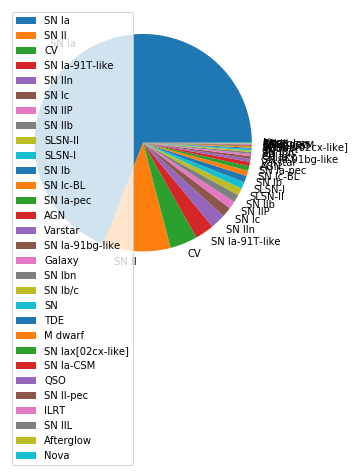

In [19]:
df_SN = all_alerce[classified_mask]["Obj. Type"].value_counts()
print(df_SN)
df_SN.plot.pie(y="count", figsize=(5, 5))
plt.axis("off")
plt.legend()

In [20]:
all_alerce.loc[classified_mask][(all_alerce[classified_mask]["Obj. Type"] == 'SN IIb')]

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s,url
210,49436,SN 2019wqq,10:35:04.834,+46:33:38.16,SN IIb,0.011230,NaN,NaN,ZTF,ZTF,...,1,1,NaN,17.5470,r-ZTF,2019-12-11 10:17:11.000,ZTF_CLU_PUBLIC,NaN,NaN,http://alerce.online/object/ZTF19acxxwvi
272,47638,SN 2019tzx,12:02:14.040,+75:48:40.50,SN IIb,0.043500,NaN,NaN,"ZTF, ATLAS, GaiaAlerts","ZTF, ATLAS, GaiaAlerts",...,1,1,NaN,18.9200,r-ZTF,2019-10-29 11:52:26.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19ackjene
255,46084,SN 2019rta,08:28:49.316,+75:19:40.95,SN IIb,0.027000,NaN,NaN,ZTF,ZTF,...,1,1,NaN,17.9600,g-ZTF,2019-10-03 10:17:35.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19accjfgv
126,44599,SN 2019pof,01:12:37.873,+33:02:05.77,SN IIb,0.015500,NaN,NaN,"ZTF, ATLAS, Pan-STARRS1","ZTF, ATLAS, Pan-STARRS1",...,1,1,NaN,19.2400,r-ZTF,2019-09-07 09:49:20.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19abxtcio
417,43684,SN 2019ofk,16:18:30.069,+18:28:30.24,SN IIb,0.035610,NaN,NaN,"ZTF, ATLAS, Pan-STARRS1","ZTF, ATLAS, Pan-STARRS1",...,1,1,NaN,19.7600,g-ZTF,2019-08-20 03:38:45.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19abqmsnk
446,43577,SN 2019obh,04:36:22.245,-10:22:20.05,SN IIb,0.035500,NaN,NaN,"ZTF, Pan-STARRS1","ZTF, Pan-STARRS1",...,1,1,NaN,19.3000,r-ZTF,2019-08-18 12:10:21.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19abqykei
263,39676,SN 2019iij,14:56:33.530,-25:50:10.90,SN IIb,0.028950,NaN,NaN,"ZTF, GaiaAlerts","ZTF, GaiaAlerts",...,1,1,NaN,19.5900,g-ZTF,2019-06-28 04:32:34.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19abbywep
290,39607,SN 2019igh,14:13:39.492,+07:39:25.36,SN IIb,0.025000,NaN,NaN,"ZTF, ATLAS, Pan-STARRS1","ZTF, ATLAS, Pan-STARRS1",...,1,1,NaN,19.0500,r-ZTF,2019-06-27 04:37:36.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF19abbthwy
175,36841,SN 2019eev,09:57:05.860,+08:04:10.17,SN IIb,0.042000,NaN,NaN,"ZTF, ATLAS, Pan-STARRS1","ZTF, ATLAS, Pan-STARRS1",...,1,1,NaN,19.6600,r-ZTF,2019-04-21 03:42:38.000,ZTF_AMPEL_COMPLETE,NaN,NaN,http://alerce.online/object/ZTF19aarhhfx
122,36025,SN 2019daf,13:47:48.122,+72:03:00.38,SN IIb,0.035000,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.0000,r-ZTF,2019-04-07 07:30:21.000,ZTF_AMPEL_COMPLETE,NaN,NaN,http://alerce.online/object/ZTF19aapadxs


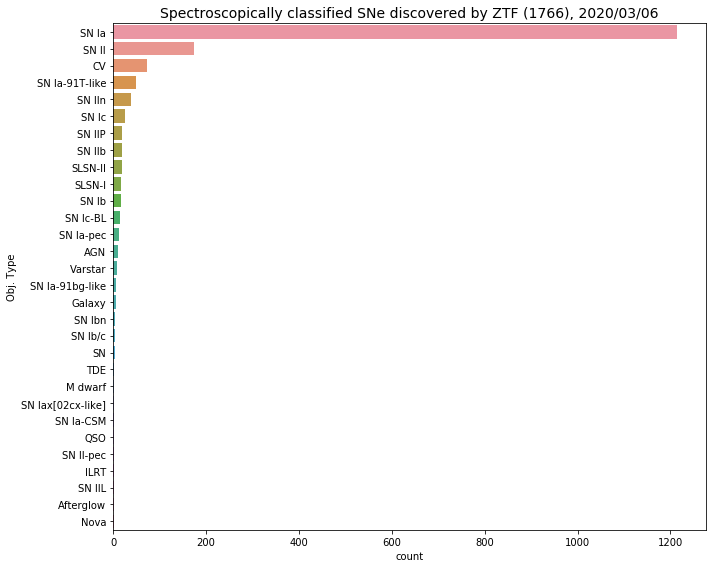

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
#sns.set(style="darkgrid")
counts = all_alerce[classified_mask]["Obj. Type"].value_counts()
sns.countplot(ax=ax, y="Obj. Type", data=all_alerce[classified_mask], order=counts.index)#cl[n.argsort()[::-1]])
ax.set_title("Spectroscopically classified SNe discovered by ZTF (%i), %s/%02i/%02i" % 
             (classified_mask.sum(), now.year, now.month, now.day), fontsize=14)
#ax.axvline(2.5, c = 'gray')
plt.tight_layout()
plt.savefig("ztf_plots/SN_types.png")

In [22]:
classified_oids = all_alerce[classified_mask]["Disc. Internal Name"].tolist()

In [23]:
oids = [oid for oid in sent if oid not in retracted]
oids = np.array(oids, dtype = str)

# Optional, use all SNe found, not just those in TNS

In [24]:
mode="tns" #'tns' 'all'
if mode == "all":
    oids = []
    for file in os.listdir("candidates"):
        if file[-3:] == 'txt':
            for oid in open("candidates/%s" % file, 'r').readlines():
                oids.append(oid[:-1])
    oids = np.array(oids)
    oids = np.unique(oids)
    oids = [oid for oid in oids if oid not in retracted]
    oids = np.array(oids, dtype = str)
elif mode=="tns":
    oids = [oid for oid in sent if oid not in retracted]
    oids = np.array(oids, dtype = str)

# Run all these cells if you want to update the results

In [25]:
alerce = AlerceAPI()

In [26]:
import json
credentials_file = "../usecases/alercereaduser_v2.json"
with open(credentials_file) as jsonfile:
    params = json.load(jsonfile)["params"]

In [27]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [28]:
query = "select tablename from pg_tables where schemaname='public';"
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="tablename")

,tablename
9,asassn
18,class
10,crtsnorth
12,crtssouth
4,detections
23,early_classification_v2
16,features
22,features_v2
2,features_v3
24,ingestion_timestamp


In [29]:
alltabs = []
for tab in sorted(tables.tablename):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

,table,column_name,data_type
0,asassn,ASAS-SN Name,text
1,asassn,Other Names,text
2,asassn,LCID,integer
3,asassn,ra,double precision
4,asassn,dec,double precision
5,asassn,Mean VMag,double precision
6,asassn,Amplitude,double precision
7,asassn,Period,double precision
8,asassn,Type,text
9,asassn,Url,text


In [30]:
query='''
select objects.oid, objects.firstmjd, objects.nobs, objects.meanra, objects.meandec
from objects
where objects.oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
SNe = pd.read_sql_query(query, conn)
SNe.set_index('oid', inplace=True)
SNe.head()

,firstmjd,nobs,meanra,meandec
oid,,,,
ZTF17aaabgiw,58450.356979,66.0,88.021955,-2.955494
ZTF17aaabmmr,58450.399340,96.0,75.895784,4.936468
ZTF17aaabzuq,58430.359421,177.0,76.875702,-6.171153
ZTF17aaaejau,58379.308079,12.0,320.369095,29.261458
ZTF17aaagubx,58442.343009,2.0,119.779512,17.329692


In [31]:
query='''
select oid, candid, mjd, fid, magpsf, sigmapsf, magpsf_corr, sigmapsf_corr
from detections
where detections.oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
all_detections = pd.read_sql_query(query, conn)
all_detections.set_index('candid', inplace=True)
all_detections.head()

,oid,mjd,fid,magpsf,sigmapsf,magpsf_corr,sigmapsf_corr
candid,,,,,,,
874189471315015008,ZTF18aahwquy,58628.189479,1,19.372358,0.151821,17.035826,0.022073
874192650115015006,ZTF19aavkuzh,58628.192651,1,18.724566,0.092408,18.724566,0.092408
874192193215015005,ZTF18acrhezb,58628.192199,1,20.527170,0.213962,20.527170,0.213962
874194005615015006,ZTF19aatxwzp,58628.194005,1,20.320505,0.205214,18.318943,0.056551
874194950515015019,ZTF18aaqjoov,58628.194954,1,19.916801,0.158532,19.916801,0.158532


In [32]:
query='''
select oid, fid, diffmaglim, mjd
from non_detections
where non_detections.oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
all_non_detections = pd.read_sql_query(query, conn)
all_non_detections.set_index('mjd', inplace=True)
all_non_detections.head()

,oid,fid,diffmaglim
mjd,,,
58466.309954,ZTF17aaabgiw,1,19.848200
58469.175660,ZTF17aaabgiw,1,19.327101
58472.273715,ZTF17aaabgiw,2,19.685101
58476.282338,ZTF17aaabgiw,1,19.300400
58476.306539,ZTF17aaabgiw,2,19.747499


# Histogram of cadences

In [33]:
dts = []
dts_1st = []
dts_fid = []
for oid in all_detections.oid.unique():
    mask = (all_detections.oid == oid)
    times = np.sort(np.array(all_detections.loc[mask].mjd.unique()))
    if mask.sum() > 1:
        dts.append(times[1:] - times[:-1])
        dts_1st.append([times[1] - times[0]])
    for fid in [1, 2]:
        mask = (all_detections.oid == oid) & (all_detections.fid == fid)
        times = np.sort(np.array(all_detections.loc[mask].mjd.unique()))
        if mask.sum() > 1:
            dts_fid.append(times[1:] - times[:-1])
dts = np.concatenate(dts)
dts_1st = np.concatenate(dts_1st)
dts_fid = np.concatenate(dts_fid)

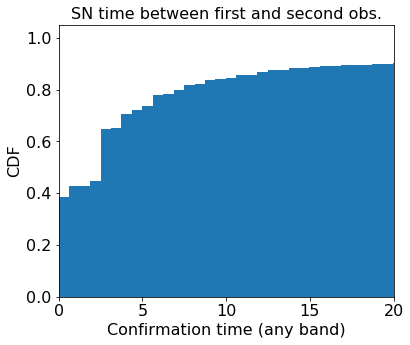

In [34]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(dts_1st, bins=1000, cumulative=True, density=True);
ax.set_xlim(0, 20)
ax.set_xlabel("Confirmation time (any band)", fontsize=16)
ax.set_ylabel("CDF", fontsize=16)
ax.set_title("SN time between first and second obs.", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("ztf_plots/SNconfirmation_any_%s.png" % mode)

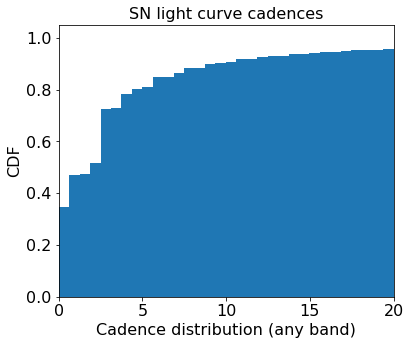

In [35]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(dts, bins=1000, cumulative=True, density=True);
ax.set_xlim(0, 20)
ax.set_xlabel("Cadence distribution (any band)", fontsize=16)
ax.set_ylabel("CDF", fontsize=16)
ax.set_title("SN light curve cadences", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("ztf_plots/SNcadence_any_%s.png" % mode)

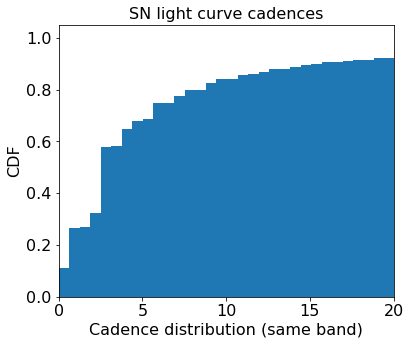

In [36]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(dts_fid, bins=1000, cumulative=True, density=True);
ax.set_xlim(0, 20)
ax.set_xlabel("Cadence distribution (same band)", fontsize=16)
ax.set_ylabel("CDF", fontsize=16)
ax.set_title("SN light curve cadences", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("ztf_plots/SNcadence_same_%s.png" % mode)

# Extract relevant features

In [37]:
nobs = []
dts = []
dt2s = []
dmags = []
dts_fid = []
dmags_fid = []
dmdt_fid = []
first_mjds = []
first_det_mags = []
max_mags = []
max_mjds = []
dt_first_max = []
dmag_first_max = []
ras = []; decs = []
reporting_date = []
reporting_time = []

ids_to_drop = []

for SN in oids:#["ZTF19abpsana"]:
    if SN in SNe.index:
        stats = SNe.loc[SN]
    else:
        print("#### skipping SN ####")
        ids_to_drop.append(SN)
        continue
    stats.dropna(inplace=True)
    detections = all_detections[all_detections.oid == SN]
    non_detections = all_non_detections[all_non_detections.oid == SN]
    try:
        nobs.append(int(stats.nobs))
    except:
        print("#### no stats ####")
        print(stats)
        ids_to_drop.append(SN)
        continue
    
    first_det_idx = detections.mjd.idxmin()
    first_det_mjd = float(detections.loc[first_det_idx].mjd)
    first_det_fid = int(detections.loc[first_det_idx].fid)
    first_det_mag = float(detections.loc[first_det_idx].magpsf)
    first_det_mags.append(first_det_mag)
    ras.append(stats.meanra)
    decs.append(stats.meandec)
    first_mjds.append(first_det_mjd)
    max_mjds.append(detections.loc[detections.magpsf.idxmin()].mjd)
    max_mags.append(detections.loc[detections.magpsf.idxmin()].magpsf)
    dt_first_max.append(max_mjds[-1] - first_mjds[-1])
    dmag_first_max.append(first_det_mags[-1] - max_mags[-1])
    
    mask = non_detections.index < first_det_mjd
    if np.sum(mask) > 0:
        last_non_det_mjd = np.array(non_detections.index[mask]).max()
        last_non_det_mag = non_detections.loc[last_non_det_mjd].diffmaglim
        if last_non_det_mag.shape != ():
            last_non_det_mag = last_non_det_mag.unique()[0]
        dts.append(first_det_mjd - last_non_det_mjd)
        dmags.append(last_non_det_mag - first_det_mag)
    else:
        dts.append(None)
        dmags.append(None)

    mask = (non_detections.index < first_det_mjd) & (non_detections.fid == first_det_fid)
    if np.sum(mask) > 0:
        last_non_det_fid_mjd = non_detections.index[mask].max()
        last_non_det_fid_mag = non_detections.loc[last_non_det_fid_mjd].diffmaglim
        if last_non_det_fid_mag.shape != ():
            last_non_det_fid_mag = last_non_det_fid_mag.unique()[0]
        dts_fid.append(first_det_mjd - last_non_det_fid_mjd)
        dmags_fid.append(last_non_det_fid_mag - first_det_mag)
        dmdt_fid.append(dmags_fid[-1] / dts_fid[-1])
    else:
        dts_fid.append(None)
        dmags_fid.append(None)
        dmdt_fid.append(None)
    
    if nobs[-1] > 1:
        second_det_mjd = detections.mjd[detections.mjd > first_det_mjd].min()
        dt2s.append(second_det_mjd - last_non_det_mjd)
    else: 
        dt2s.append(None)
        
    print(SN, nobs[-1], dts[-1], dt2s[-1], dmags[-1], dmags_fid[-1], dt_first_max[-1])
    

ZTF20aaovpbz 5 3.0249653002028936 5.979004700202495 -0.4603996276855007 -0.4603996276855007 17.86969909959589
ZTF20aaskdhj 2 8.967962999799056 9.004398200202559 1.6114597320556001 1.8357601165770987 0.03643520040350268
ZTF20aaskblh 2 7.991655099802301 8.040335599900573 1.3351192474364986 1.3351192474364986 0.0
ZTF20aarbvey 5 5.915844900002412 10.937442100104818 0.787300109863299 1.0915012359618999 5.021597200102406
ZTF20aasjzhg 2 8.94247680009721 8.985949099900608 2.8837299346924006 3.2282314300537003 0.0
ZTF20aasjzdk 3 4.974652800199692 13.955196800103295 0.23469924926759944 0.23469924926759944 8.980543999903603
ZTF20aasjzci 3 0.02730330009944737 8.004595000005793 -0.05780029296879974 -0.08409881591799717 7.9772916999063455
#### skipping SN ####
ZTF20aasiqxa 8 1.9609606999001699 2.0022222998013604 -0.47790145874019885 -0.8173999786376989 4.970381900202483
#### skipping SN ####
#### skipping SN ####
ZTF20aasivvw 4 6.961087999799929 7.002118099895597 0.05864143371589847 0.13164138793949

ZTF20aapnjww 3 0.9548958000959828 0.998032400100783 0.6460990905762003 0.19229888916019888 4.911122699799307
ZTF20aapdazm 3 0.05873840019921772 2.9868403001964907 0.05030059814459875 0.13110160827639916 8.002789400001348
ZTF20aarcpql 9 0.04309029979776824 0.07482639989757445 0.4005012512206996 0.5362014770508026 8.988900400196144
ZTF19acymuht 5 2.9981482001021504 65.79063659990061 1.806337356567301 2.0387363433837997 62.79248839979846
ZTF20aaoqqyf 15 5.949236100103008 5.988506999798119 4.7747793197632 4.0041799545288 0.0
ZTF20aarbtdi 2 0.007222299995191861 13.986388899895246 0.5012016296385973 -0.27239990234379974 13.979166599900054
ZTF18ablrnkg 12 0.0004628998940461315 25.978761499696702 2.7743110656737997 2.7743110656737997 25.978298599802656
ZTF18aavvvoy 21 3.001018500101054 3.0218403001053957 -0.40579986572260296 -0.3620014190674006 10.0220255000022
ZTF20aarehsw 2 None 12.805428300205676 None None 3.023113500305044
ZTF18aahshhp 15 4.012696800295089 628.1735764002005 1.8772430419922

ZTF20aappgod 9 3.046967500100436 3.0837383999023587 -0.3654003143311009 -0.9283008575440022 10.021805599797517
ZTF20aappghw 6 2.9934375000957516 14.951527799799806 -0.3155002593994993 -0.3155002593994993 11.958090299704054
ZTF18abbwgtq 92 2.9615047000988852 21.003240800004278 0.564601898193402 0.564601898193402 362.91873839970503
ZTF20aaolglj 12 4.91913200019917 4.9543171999030164 -0.2973003387451989 -0.43779945373539775 5.017141199605248
ZTF20aamogaf 22 0.04891200010024477 1.0433564997947542 -0.05521774291990056 -0.8561191558837002 6.994791699995403
ZTF18abjijwk 20 2.8077662001014687 2.872858800103131 0.36900138854980113 0.6291999816893998 13.114386599998397
ZTF20aapnxrf 5 0.1379975999952876 5.0618633997946745 -0.08860015869139914 -0.675298690795799 4.923865799799387
ZTF20aaoxbju 21 3.003159699801472 5.992962899901613 -0.6022014617920028 -0.6022014617920028 9.074733800298418
ZTF20aapmeci 2 3.896284700000251 3.938032400001248 1.8611507415771982 1.8611507415771982 0.0417477000009967
ZTF

ZTF20aanvlil 9 6.981840299798932 7.024791699797788 0.44345474243160155 0.44345474243160155 9.99638890010101
ZTF20aansmkx 9 7.816851800096629 7.961793999900692 0.7349853515625 0.848585128784201 10.121446799901605
ZTF20aansmhs 4 5.828900499800511 5.966898099999526 -0.4085445404052983 -0.4085445404052983 0.0
ZTF20aamttmo 12 2.9758912001998397 6.0420834000979085 -0.040786743164002104 -0.1700878143310014 13.076493099797517
ZTF20aamttiw 14 2.9617246001944295 6.0287848001971724 1.2178516387939027 1.3958530426025 0.0
ZTF18aajhhwu 21 2.9814467000978766 597.1789582999991 1.301763534545902 1.0089626312256001 603.3132639001997
ZTF20aansmlm 5 5.827546299806272 5.933761499800312 -0.41367149353030186 -0.41367149353030186 5.084479100099998
ZTF20aamksoq 9 2.939120299895876 3.017662000194832 -0.17609977722169745 0.6127014160156001 7.914259300101548
ZTF20aallmis 11 2.9567708001995925 8.934722200094257 -6.027900695800801 -6.027900695800801 13.000196799599507
ZTF20aanshtt 15 0.900011599798745 7.79505789999

ZTF18aataceh 9 2.9992824000000837 3.034745400203974 0.04299926757810013 0.2805004119872976 11.973807900198153
ZTF18acvbzlh 12 2.9780786998016993 2.991851799801225 0.8746776580811009 0.8746776580811009 0.05907410009967862
ZTF20aahtjrc 8 2.988449100201251 5.971678300098574 0.6886444091796982 0.6886444091796982 2.9832291998973233
ZTF20aagjqsl 12 1.0045485997979995 8.017569400202774 -0.4675006866455007 -0.4675006866455007 22.967870300199138
ZTF20aamhocj 16 None 23.435844899897347 None None 6.066504599999462
ZTF20aamhnym 8 None 23.437650400097482 None None 0.0
ZTF18aawzmhv 2 None 23.422696700203232 None None 0.0
ZTF20aamdyal 42 0.8691898001998197 0.9999074000006658 0.11880111694339845 0.06120109558109732 10.125104199600173
ZTF20aamdqiz 26 2.942696799800615 5.792233799802489 0.06430053710939987 0.5223999023437997 7.959710600298422
ZTF20aamaqak 29 0.04379630020412151 3.000497699904372 0.4943008422851989 0.534200668335 10.81390039989492
ZTF20aamfpcj 40 0.012766200197802391 0.950555599796644 -0

ZTF20aalbswe 2 4.979212900201674 5.017546199800563 0.4135990142822017 0.4135990142822017 0.038333299598889425
ZTF20aalbgef 34 0.016712899996491615 1.9356943999955547 -0.22649955749520245 -0.22649955749520245 13.908877400201163
ZTF20aakivvw 7 1.9321180997940246 4.930092599897762 0.0364990234375 0.0364990234375 17.067118000202754
ZTF20aakmffg 2 0.06443289999879198 7.075798700097948 0.12880134582519887 -0.026899337768501397 7.011365800099156
ZTF20aahdwdw 2 0.8140741001989227 16.758101800201985 -0.14940071105949926 0.7084999084473012 15.944027700003062
ZTF20aadyati 1 1.001516200201877 None 0.444330215454098 0.444330215454098 0.0
#### skipping SN ####
ZTF20aaklfze 3 0.004050900002766866 0.00450230000569718 0.4720001220702983 0.4720001220702983 6.9968170998981805
ZTF20aadcxxm 4 0.026643500095815398 1.0225578000972746 0.1845417022705007 -0.8287582397461009 11.93337959980272
ZTF20aakzjui 3 1.9862615999008995 7.917696799806436 1.324834823608402 1.5368347167968999 5.931435199905536
ZTF19aavxilv 

ZTF20aajcnfm 2 2.9396759001974715 11.035613399995782 -0.7238006591797017 -0.9280014038086009 8.09593749979831
ZTF20aajbxvq 6 2.9993633999984013 11.037291699998605 -0.5284004211425 -0.5284004211425 8.037928300000203
#### skipping SN ####
ZTF20aajbsru 5 0.0004629998002201319 14.983773200103315 -0.0412006378173011 -0.0412006378173011 28.94903930000146
ZTF20aajctzu 2 2.9963425998939783 25.814560200095002 -0.055000305175799014 -0.055000305175799014 22.818217600201024
#### skipping SN ####
ZTF20aaenggw 3 0.03437500010477379 15.911006999900565 0.41044616699219816 0.38544654846189985 0.0
ZTF20aajbdvd 2 0.12519670000619953 19.957719900201482 -0.5018005371093999 0.4834995269775 19.832523200195283
#### skipping SN ####
ZTF20aaizylq 2 0.04317130020353943 8.940243099903455 -0.20770072937010298 -1.2667999267578018 8.897071799699916
ZTF20aajwapc 5 21.965648199999123 22.003935199798434 -0.7068004608153977 None 0.03828699979931116
ZTF20aajvzqz 4 21.965648199999123 22.003935199798434 -0.6609077453613992

ZTF20aagkyty 32 3.0157638999953633 7.9583333997943555 -0.3536376953125 -0.3536376953125 39.86019680000027
ZTF20aahkgcz 57 0.9212037001998397 1.9451967998029431 -0.10770034790029825 -0.10409927368159799 18.02265049990092
ZTF20aagzfsz 15 3.940231499800575 3.9945834000973264 -1.9108104705811009 -0.061210632324200986 11.01015050010028
ZTF19acbumtn 7 7.9847221999953035 10.983831000194186 0.058000564575198865 -2.1877994537354013 27.98430560019915
ZTF18abytcbx 17 0.03694440019899048 4.000949099798163 -2.053392410278299 -2.053392410278299 12.978946799899859
ZTF20aahhzxr 10 4.985138899901358 5.023078699901816 -2.2552375793456996 -1.7091369628906996 13.016354200000933
ZTF20aaifyny 7 18.963993100100197 18.985891200201877 -0.2877864837646982 -0.2877864837646982 0.0
ZTF20aaifygw 17 12.025625000096625 12.026527800000622 -0.8785648345947017 -0.2935657501221023 0.0009027999039972201
ZTF20aaigcux 6 17.967326399797457 20.943969900195953 -0.22669792175300074 None 37.91168980020302
ZTF20aaifybu 27 None -1

ZTF20aagjqxg 1 4.990983800198592 None -1.142333984375 -1.2523345947266016 0.0
ZTF20aagnbfu 25 4.986608799998066 5.02799770009733 -0.03976631164550071 -0.03976631164550071 0.04138890009926399
ZTF20aagnbes 53 11.96204870010115 12.003437500003201 0.5613670349120987 0.5613670349120987 6.9969675996981096
ZTF20aagnbec 20 None 12.00298620020476 None None 0.04138890000467654
ZTF20aafcnem 31 6.937662000003911 6.956481500201335 -0.4173011779785014 -0.09080123901360082 20.038958299897786
ZTF20aadccun 14 0.9977430998987984 1.9734375002008164 -0.17340087890629974 -0.17340087890629974 14.984305500103801
ZTF20aaflaug 50 2.0690277998000965 2.129988399996364 -0.857198715209897 -0.857198715209897 11.128252299997257
ZTF20aafkqht 23 2.964525399802369 2.9927777000993956 -0.22679901123050072 -0.09350013732910156 11.03797460019996
ZTF20aafchgb 33 4.044374999997672 4.066747600198141 0.7240848541260014 0.9763851165772017 4.934224499906122
ZTF20aafxahn 57 0.007905099999334197 1.920358799798123 -0.25129890441900

ZTF20aaelwbc 9 2.9721181002023513 5.998738400201546 -0.07979965209960227 -0.09140014648439987 9.899293900001794
ZTF20aaezizk 27 0.04342589979933109 0.8831597001990303 -0.349100112915 -0.349100112915 6.9410070004014415
ZTF20aafeccu 13 0.963981499800866 0.9855902999042883 -1.2403182983397976 -2.7160186767577983 9.002245299998322
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
ZTF20aafebsm 1 0.10597219989722362 None 0.14686775207520242 0.23576736450189983 0.0
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
ZTF20aafachc 3 1.0072801001006155 1.9852777999039972 1.0777282714843004 1.0777282714843004 0.0
ZTF20aaesfac 14 0.0627082998980768 3.016469899797812 -0.8218994140625 -0.6357994079589986 8.004467600003409
ZTF20aafdlte 5 0.020636600100260694 1.0037615999026457 -1.1043987274169993 -0.1620998382568999 0.0
ZTF19adbmggr 6 7.982326399906015 8.00437499

ZTF20aacfvnj 12 1.000381900004868 1.0237962999017327 -1.1631984710693999 -1.1631984710693999 7.07626159999927
ZTF19adaopnx 3 0.9565393999000662 2.993055600200023 0.63570022583 0.63570022583 4.05898139999772
ZTF20aaeabyu 6 0.0206249998009298 3.0185416000022087 -0.6402988433837997 -1.038398742675799 11.969675899999856
ZTF20aaeiatj 3 0.003669000099762343 6.020694400103821 0.5348987579346023 0.5348987579346023 6.017025400004059
ZTF20aabqiiz 22 None 0.9980439998980728 None None 19.936435199793777
ZTF20aabqhfb 46 7.998726800098666 11.955752300098538 -2.9658012390137003 -2.920801162719801 37.97239589969831
ZTF19aawumix 17 2.937129700098012 5.939606499901856 0.11261177062990058 0.11261177062990058 249.3492707996993
ZTF19aasxwky 13 2.9900694000025396 160.27938649990392 0.9953670501708984 0.9953670501708984 234.2706249999028
ZTF18acvlprq 17 6.990775499994925 371.9997916998982 -0.8224620819091975 -0.8224620819091975 367.98627319970547
ZTF18abceili 15 3.05920130010054 83.00101849989733 -2.25569152

ZTF20aacbniz 12 6.931620300099894 7.00122679980268 -3.4714984893799006 -2.8454990386963033 28.006307899901003
#### skipping SN ####
ZTF18acmwmid 23 7.06299770019541 25.997870400096872 1.3304615020752024 1.3304615020752024 422.9016666999014
ZTF20aaeachr 4 7.977256899801432 15.999976799997967 -1.9839992523193004 -1.9839992523193004 8.059953700299957
ZTF19acxyuza 13 24.016898100198887 26.894513899802405 0.03932762145990054 0.03932762145990054 26.810451400000602
ZTF19adbngtj 3 7.042361100204289 13.015069399902131 -4.358192443847599 -4.358192443847599 6.034953699898324
ZTF20aaepehs 7 6.992291700196802 11.041064799901505 -1.372999191284201 -1.372999191284201 10.030613399598224
ZTF19adajqnc 7 5.945926000000327 19.936898199899588 0.009885787963899162 None 0.0
ZTF19aczkimu 6 None 4.9757407997967675 None None 4.980277800001204
ZTF19aczkaxf 7 0.041585700106224976 15.00030090000655 0.22752761840820312 -1.5241718292235973 39.83093750009721
ZTF19acykakk 12 None 1.0559954000054859 None None 5.9459259

ZTF19acxyuon 6 0.1351620001005358 8.131412000002456 -0.10714340209959872 0.22425651550290127 23.991597199899843
ZTF19acxyuel 14 None 0.12938650010619313 None None 23.020543899903714
ZTF19acxysdc 45 24.002962900201965 27.003750000003492 -0.16738128662110086 -0.46448135375980115 9.93403939990094
ZTF19acxxwzs 34 4.920787000199198 7.945335600095859 -1.0506973266600994 0.5365028381348012 55.07540509990213
ZTF19acyadct 8 0.036134299996774644 0.10879630009731045 4.1867809295653995 4.1867809295653995 37.996030000002065
ZTF19abyfvgi 7 0.02097219999996014 9.928205999793136 3.110580444335998 3.129379272460998 102.81346070019936
ZTF19adbhdto 2 0.03358799989655381 3.0313310002020444 2.3659992218018004 2.5352993011475 2.9977430003054906
ZTF18aaghrai 5 2.068263900000602 341.123611099596 2.427608489990199 2.427608489990199 403.97586799969577
ZTF18adazuts 6 4.954363400094735 108.68356479979411 3.2247514724730983 3.2247514724730983 357.99660879980365
ZTF19adazbgu 8 7.9226041998990695 10.975659800198628 

ZTF19acxyucu 13 24.038275399994745 24.055601800093427 0.1181392669677983 0.1181392669677983 4.993067199800862
ZTF19acyljdy 8 0.9582176000039908 2.9214931001042714 1.246635437011701 0.8284358978272017 0.0
ZTF19acxzcdu 4 0.016574100103753153 4.0027777998984675 -0.9910850524902024 0.8626155853271982 3.9862036997947143
ZTF19acytfkw 18 3.0236226997949416 5.023310200100241 0.3152999877930007 0.3152999877930007 7.059606500006339
ZTF19aabxhxv 7 0.014085699804127216 92.77444439980172 3.8791370391845987 4.507736206054702 116.73462960030156
ZTF19acylgmg 6 7.862002400201163 7.895682900198153 0.31064605712889914 2.272445678710998 2.0380670996019035
ZTF19acykdhc 5 7.921701399900485 10.901666699799534 -0.6846008300781001 -0.6846008300781001 9.998981500102673
ZTF18acfqohu 3 0.07012729999405565 319.01555549999466 1.992219924926797 2.824020385742198 403.87120370010234
ZTF18abzrcnf 74 1.9372223001046223 36.01611120020243 3.0895099639891974 3.0895099639891974 285.19730319969676
ZTF19acjifps 10 None 448.18

ZTF19acwwulz 9 5.0441783001006115 5.085173599894915 -0.38679885864259944 0.14660072326660156 8.022430499993789
ZTF19acwrnyp 1 0.06778930019936524 None -0.5951843261718999 0.5729160308837997 0.0
ZTF19acwbpjy 2 4.9166434998987825 5.01505790000374 1.0803508758545028 0.6263504028320028 0.0
ZTF19acvvrty 2 1.9437732001024415 6.997951399804151 2.5009288787841975 2.7013301849364986 5.05417819970171
ZTF19aculsgh 15 4.915775399997074 4.951296300096146 -0.067701339721701 -0.067701339721701 16.960416699803318
ZTF19abtcapa 31 2.994212900099228 100.68171290009923 1.8326511383056996 1.8326511383056996 97.6875
ZTF18ackxqed 4 0.08555560000240803 383.9356019003026 4.702392578125002 4.907093048095701 383.85004630030016
ZTF18acjwolk 11 2.9338656999971136 3.0194212999995216 3.6105613708495987 4.264060974121097 383.9356019003026
ZTF18acizsca 8 2.9129745997997816 15.969374999898719 3.5200805664062997 3.7821807861327983 0.0
ZTF19acttpsv 30 0.9624189999012742 1.9842130000979523 -1.121099472045902 -0.8418006896

ZTF19abtybfa 5 0.022974499996053055 63.850740700101596 1.0580101013183985 1.1760101318358984 63.82776620010554
ZTF19abtybey 4 0.022974499996053055 64.87839119979617 1.0840091705322976 1.2020092010497976 64.85541669980012
ZTF18abddzat 16 2.989803300202766 67.93263889980153 0.431089401245103 0.9345893859863033 424.93799769970065
ZTF19acvfvrt 1 6.953043999899819 None 0.009355545043899127 0.009355545043899127 0.0
ZTF19acudlnz 3 6.017951400201127 7.047314800001914 0.22811889648439987 0.28371810913089845 1.0293633998007863
ZTF19acvfqav 2 11.016006899793865 11.030879600199114 0.5752773284912003 0.5752773284912003 0.014872700405248906
ZTF19acsjywu 2 4.962743000200135 14.961932799800707 -0.6450881958006995 -0.6450881958006995 9.999189799600572
ZTF19acudmhc 8 6.0059143000034965 6.0063889001030475 0.4754638671875 0.4754638671875 7.976967600094213
ZTF19acudmfk 3 6.017500000001746 7.012777800096956 -0.11176490783689985 0.045133590698199555 1.0150578999964637
ZTF19acucmpp 3 1.027349500101991 5.95714

ZTF19acrwlvw 2 0.10056710000208113 0.10149300000193762 1.3263835906981996 1.3263835906981996 0.0
ZTF19acrwlur 2 0.10056710000208113 0.10149300000193762 1.64866065979 1.64866065979 0.0009258999998564832
ZTF19acrwkop 2 0.06908570010273252 0.0881366000030539 2.1917762756347017 2.1917762756347017 0.0
ZTF19acrvtev 2 0.8211921000984148 0.8222452998015797 1.7916336059571023 2.1920337677002024 0.0
ZTF19acrvszx 1 0.8216435001959326 None 0.6873703002929012 0.9791698455810014 0.0
ZTF19acrvsrk 2 0.8198263999001938 0.8216435001959326 1.6741161346436009 1.2512168884277024 0.0018171002957387827
ZTF19acrvsls 2 0.9303934999043122 0.9317592002043966 0.8415393829345028 0.8415393829345028 0.001365700300084427
ZTF19acrvslr 2 0.9303934999043122 0.9317592002043966 1.3775386810302024 1.3775386810302024 0.001365700300084427
ZTF19acrvreg 2 0.9276851999020437 0.9303934999043122 0.516527175903299 0.516527175903299 0.0
ZTF19acrvqwk 2 0.9295023000013316 0.9304166998990695 1.4554424285888992 1.4554424285888992 0.000

ZTF19acqypso 37 0.00412040000082925 0.9710301000013715 0.06129264831550074 0.06129264831550074 7.941701299896522
ZTF19acoyxuv 3 3.0011342998041073 9.977870400201937 1.3600196838378977 None 0.0
ZTF19acobfoo 5 2.815023199902498 2.9675116002035793 2.8030872344971023 2.8030872344971023 0.15248840030108113
ZTF18abusrtw 6 None -112.18637730009505 None None 426.8648958000995
ZTF19acqdbad 17 3.029120400096872 3.0478587997931754 4.571515083313001 4.571515083313001 0.01873839969630353
ZTF19acrolpe 4 0.03701390020432882 0.03748840020125499 1.7372207641601989 1.8488197326659979 0.0
ZTF19acrdpwj 23 1.1018749998984276 1.1527545999051654 2.1975727081299006 2.3463726043702025 0.09627320010622498
ZTF19ackjrye 26 3.0002198998990934 11.023182899902167 0.11927413940430043 None 42.006145799998194
ZTF19acsbzbn 2 0.018426000198815018 0.019328800102812238 0.3377037048339986 0.9962024688720987 0.0009027999039972201
ZTF19acsbzbb 2 0.019328700196638238 0.019780100097705144 0.478021621704098 1.0919208526610973 0.

ZTF19acrymag 2 0.06297450020065298 0.06342590010171989 1.1861820220947017 0.9357814788818004 0.00045139990106690675
ZTF19acrylvx 2 0.08025460009957897 0.08252309980161954 1.2857074737549006 1.1765060424805007 0.0022684997020405717
ZTF19acryltw 2 0.06297450020065298 0.06342590010171989 0.2987213134766016 0.054420471191399145 0.0
ZTF19acrylrc 2 0.06297450020065298 0.06387730009737425 1.002229690551701 0.6755294799804012 0.0
ZTF19acrylnq 2 0.08025459989585215 0.08296299999346957 0.5219707489012997 0.26547050476069955 0.0
ZTF19acrylnp 2 0.08025459989585215 0.08296299999346957 0.9769725799560014 0.7204723358154013 0.0
ZTF19acrylma 2 0.06297450020065298 0.06387730009737425 2.962892532348601 2.351091384887699 0.0009027998967212625
ZTF19acryljc 2 0.08025459989585215 0.08296299999346957 0.498428344726598 0.3073291778564986 0.0
ZTF19acrylid 2 0.08025459989585215 0.08296299999346957 1.7286376953125 1.4396381378174006 0.0
ZTF19acrylfm 2 0.062523099797545 0.06297450020065298 0.6331939697266016 -0.1

ZTF19acqmwtg 4 2.9767592001953744 3.008807799895294 0.7387599945068004 1.4208602905273011 9.998460699804127
ZTF19acnvbvu 4 3.0023264000046765 6.9873611001021345 0.28069686889650214 0.28069686889650214 9.974988399997528
ZTF19acozdpl 5 0.988009299901023 1.9883564998017391 0.1525974273681996 0.1525974273681996 11.976782400204684
ZTF19acopsvd 4 7.014386600196303 9.991145800195227 1.7347259521485014 1.8625259399415022 3.008807799698843
ZTF19aclkbqc 11 2.9893519001998357 5.965451400094025 0.9035892486572017 0.9035892486572017 12.97278929969616
ZTF19acokufi 15 2.9919908000010764 2.999618099995132 0.221652984619098 0.221652984619098 11.907418999893707
ZTF19acmvvos 3 2.957986099900154 7.984652700200968 -2.2602481842041016 -0.49874877929689987 17.037071700200613
ZTF19ackjrru 120 6.02089120009623 6.021365700100432 0.326919555664098 0.326919555664098 37.90863419970265
ZTF19aagnixq 17 3.138483800001268 265.245254599904 -0.8526287078858026 -0.8526287078858026 317.13765050000075
ZTF19acprqpf 2 0.0595

ZTF19acjtnrp 3 2.987129600100161 2.988483799897949 0.4820632934571023 0.4284629821778019 0.0
ZTF19achumlz 2 3.9924769001008826 12.035023100201215 0.17343902587889914 0.463739395141598 0.0
ZTF19acmvrum 3 7.9798611001024256 8.00203699980193 -0.3922672271729013 0.0807323455810014 0.022175899699504953
ZTF19acjqecl 10 6.065115800098283 6.092187500100408 1.1820487976074006 1.1820487976074006 11.773599499800184
ZTF19acjmcal 9 4.93354169990198 6.926932899899839 0.6104049682616974 0.6104049682616974 83.83710650029388
ZTF19achvpik 8 3.028553300202475 7.028784799898858 0.5006294250487997 0.5006294250487997 10.936249999802385
ZTF19achtfop 4 None 11.32971070019994 None None 0.0
ZTF19achsods 7 2.91629630009993 2.9813310998069937 -1.0798282623291016 -1.0798282623291016 0.06503479970706394
ZTF19acgkead 5 2.9305903002023115 14.990601899902686 -0.10397148132319955 -0.5256729125976989 53.984212999697775
ZTF19acmljox 1 2.087661999896227 None 0.07085800170899859 -0.5549430847168004 0.0
ZTF19acmgoui 1 0.904

ZTF19acjwcyx 7 8.009270800197555 10.986689799799933 0.3342113494872976 -0.2328872680664027 6.129965299696778
ZTF19acjwclh 5 5.981041599799937 8.958460599904356 0.38927841186519885 0.28257942199709873 2.977419000104419
ZTF19aclktva 1 1.0009258998034056 None 0.45915222167969816 0.45915222167969816 0.0
ZTF18abadevy 16 0.026759300104458816 1.9932406999068917 0.17599105834959872 0.5103893280029013 9.966747599697555
ZTF19acigkma 12 2.998275499798183 5.985219900001539 0.8263874053955007 0.46268844604490056 12.018483800304239
ZTF19acgjyte 13 6.979097299998102 10.880034799898567 0.04502296447749998 0.31532287597649855 3.900937499900465
ZTF19acklfll 1 0.06702550010231789 None 1.1697559356688991 0.7355575561523011 0.0
ZTF19achanck 6 0.02912040000228444 9.028402800096956 -0.025382995605500724 0.4455165863037003 11.997986100199341
ZTF19acbvzli 6 None 9.030254700199293 None None 22.024398200199357
ZTF19acgzxxc 6 5.952824100095313 8.93678239989822 0.5221729278565022 0.5221729278565022 6.0240046001054

ZTF18abnxcsp 4 5.972291600002791 438.81021990020236 1.1401081085204972 1.1401081085204972 554.2076158002019
ZTF19aciuhub 1 0.026793999997607898 None -0.29630851745599784 0.2659912109375 0.0
ZTF19acitnck 10 3.9604745000979165 3.98146990009991 1.0666809082031001 0.9602813720702983 12.001307900100073
ZTF19acitkzs 26 3.9971875000046566 4.023819400099455 1.1336383819580007 1.1336383819580007 13.050567099795444
ZTF19abokbdk 2 3.9778472001999035 3.9997453999967547 1.2548351287841015 1.0261344909668004 0.0
ZTF19acgemxh 5 3.0033565002013347 5.979895900200063 -0.5611171722412003 -0.5611171722412003 8.97480319999886
ZTF19acicxqd 1 0.08759259979706258 None -1.6073112487793004 0.08428764343259942 0.0
ZTF19achetvw 10 3.9641203998035053 7.928669000204536 0.3531360626220028 0.3531360626220028 10.935868100299558
ZTF19acgldqr 4 3.003286999897682 7.014629599900218 0.134956359863299 0.134956359863299 0.0
ZTF19acgpymd 1 3.001400500201271 None -0.9536304473876989 -0.9536304473876989 0.0
ZTF19achtzyx 1 2.971

ZTF18abrzhyq 12 0.058935199900588486 3.07806720030203 1.6100215911866016 -0.2760791778563991 150.3207986000998
ZTF19acfecsg 8 2.943275399898994 6.854062499900465 0.10703468322749998 0.47793579101560013 7.915428300002532
ZTF19acgemzm 17 3.0024189001997 5.978958300096565 0.7490501403808985 0.7490501403808985 11.983854199701454
ZTF19aceidtc 6 2.8641897997949854 5.947766200100887 1.3008193969726989 1.9822196960449006 0.0
ZTF19acgjnfz 58 5.999872700100241 6.0012847001999035 -0.004732131958000707 0.21206855773920097 13.002511600097932
ZTF19aceckmm 55 None 5.998969899803342 None None 11.001076399799786
ZTF19aceckgz 5 None 5.998969899803342 None None 0.0
ZTF19aceckgg 4 None 5.970960699800344 None None 0.0
ZTF19aceckaz 17 None -0.01756940010091057 None None 11.001076399799786
ZTF19acdakjs 5 None 6.004432900197571 None None 11.007893500398495
ZTF19acbwaex 3 None 6.006238399801077 None None 0.0
ZTF19acetgtu 6 0.030902800099283922 4.928148200197029 -0.2344684600830007 -0.2344684600830007 6.0092129

ZTF19aaslszp 1 7.9894097001015325 None -1.8571414947509979 -1.8571414947509979 0.0
#### skipping SN ####
ZTF19aasmdir 8 0.01812499999505235 29.0041088000944 0.15499305725100143 -0.5991077423095987 85.87495370020042
ZTF19aaslvwn 4 8.006053300101485 11.02344910010288 -0.3383750915527024 -0.3383750915527024 3.0173958000013954
#### skipping SN ####
#### skipping SN ####
ZTF19acekjvb 2 4.990879599899927 5.033657399901131 2.365583419799801 None 0.042777800001204014
ZTF19aceckaj 8 None 5.029571799997939 None None 5.027314899998601
ZTF19acekcsl 10 2.9771412000991404 5.975821799998812 0.5987129211425994 0.5987129211425994 9.017500000001746
ZTF19aceckht 34 None 5.977199099899735 None None 39.04458339980192
ZTF19aceckdq 17 None 5.977199099899735 None None 11.001076399799786
ZTF19aceckai 10 None 5.977199099899735 None None 5.027314899998601
ZTF19acecjzu 8 None 5.977650499902666 None None 4.985891199699836
ZTF19acbwccr 8 None 5.977650499902666 None None 11.006990699999733
ZTF19acbvujw 9 None 5.9762

ZTF19acckggd 22 2.9568866000990965 2.9897453997982666 0.128364562988299 0.2171630859375 8.964097199997923
ZTF19acboexm 21 0.0004745998012367636 2.9353473002047394 0.16366004943849788 0.16366004943849788 16.028368000399496
ZTF19acbmhsx 16 5.923194400202192 5.982812499802094 -0.16906929016110084 -0.08286857604980113 18.933564799895976
ZTF19aaaizjh 10 6.907870400202228 281.14814820000174 0.390577316284201 -0.17852210998530182 274.2402777997995
ZTF19accpnnh 5 9.869409700098913 9.916469900199445 -0.25168228149410155 -0.25168228149410155 3.085080999902857
ZTF19acchink 22 2.9573264001955977 2.999340300098993 0.31707763671879974 -0.1844234466552983 9.98244209960103
ZTF19acbsuzf 4 0.0018055998007184826 2.9944560001968057 -0.04966926574699926 -0.04966926574699926 3.031273100001272
ZTF19abkhmcv 30 6.958125000099244 9.916469900097582 0.18830871582030184 0.26740837097160153 142.74482629999693
ZTF19acbszwp 19 8.003830999798083 10.975879599995096 0.6396884918212997 0.494289398193299 14.80613430029916

ZTF19abzzuyl 24 None 9.240983799900278 None None 0.0
ZTF19abfptvy 7 5.980694399797358 81.81215279980097 0.5370597839356002 0.5370597839356002 83.85224540020135
ZTF18abvlgyt 9 2.9826389001027565 176.71828699990147 2.878278732299801 2.878278732299801 377.04450229979557
ZTF19acardcs 14 0.9717708001990104 1.997939799897722 1.2529449462891016 1.1216449737549006 10.997719899700314
ZTF19acbxbmo 2 0.03488430000288645 0.036331000199425034 0.9762001037597976 1.3432006835937003 0.0
ZTF19acbwtgi 3 3.9804281999968225 4.016805600200314 1.1135292053223012 1.0701293945312003 0.03637740020349156
ZTF19acbwouf 59 3.9804281998003717 4.009201400003803 0.8789577484131001 1.1903591156006001 13.114537100300367
ZTF19acbpxwt 99 3.9559143001024495 3.9799884000967722 0.8005523681641016 0.8005523681641016 11.033379700093064
ZTF18abffkml 43 6.001273199901334 18.953194499903475 1.638147354125902 1.638147354125902 0.0
ZTF19acbpzir 79 4.008946800204285 4.045266199900652 1.5344600677490021 1.5344600677490021 12.1514698

ZTF19acaqzoi 1 0.9999767999033793 None 0.4761772155762003 0.4761772155762003 0.0
ZTF19acaqzog 1 0.9999767999033793 None 0.6781787872313991 0.6781787872313991 0.0
ZTF19abzyiba 6 6.203761599899735 9.068900399797712 -1.1279563903808985 0.35264396667480113 12.862789300299482
ZTF19abzwceq 5 3.894050899798458 6.872523200101568 -0.3101902008056996 -0.3101902008056996 2.9784723003031104
ZTF19abzvzzr 8 3.8885300999027095 6.872534699803509 -0.26431465148930045 -0.26431465148930045 7.00057870009914
ZTF19abzvvkb 17 2.9079397999012144 5.9138309999980265 0.11167144775389914 0.11167144775389914 13.00399300029676
ZTF19abyvarn 7 2.997025500095333 5.987094900199736 1.6435146331787003 1.6435146331787003 0.0
ZTF19abyoopo 3 2.9556712999983574 11.978032400198572 0.9282321929932031 0.645832061767603 9.022361100200214
ZTF19abjfpnu 1 2.9825811002010596 None 0.7026920318604013 -0.4000091552733984 0.0
ZTF18aczoibh 1 2.950798599900736 None 1.3091430664062003 0.8509426116943004 0.0
ZTF18abmjhpw 100 3.0536920996964

ZTF19abzrffw 6 2.978414299999713 3.0032176000022446 -0.6223106384276988 0.30018997192390273 0.024803300002531614
ZTF19abzrdup 69 2.9729165999015095 2.998587899899576 -2.625949859619098 -0.17734909057609727 14.022025499900337
ZTF19abzqkdz 13 5.9590509000991005 6.0655671001950395 0.3299446105956996 0.3299446105956996 6.002754699897196
ZTF19abzlsbl 28 1.9544443999038776 2.9547338000047603 -0.606239318847603 0.7017593383788991 12.021851900099136
ZTF19abzknnj 15 4.005914400193433 6.942592599792988 -0.46382522583009944 -0.46382522583009944 5.915705999905185
ZTF19abylxyt 13 2.994895799900405 8.950740699998278 1.2664222717285014 1.272922515869201 9.956701400202292
ZTF19abyhxzp 18 2.9790855999017367 5.9213310000050114 0.7344226837158025 0.5516223907471023 13.880069500301033
ZTF19abzfgtf 17 1.0002776998007903 1.9991898000007495 -3.0995178222656 -3.0995178222656 3.052569500199752
ZTF19abzmnuk 14 2.9899306000952492 2.9903934999965713 -2.0043621063231996 -2.0043621063231996 12.996539299900178
ZTF19

ZTF19abvghhs 9 4.013668999999936 4.066331100199022 0.9626884460449006 0.9551887512207031 8.978668999901856
ZTF19abuznyi 13 2.9780324000967084 10.001585699894349 0.43969154357920104 0.831192016601598 133.66630789970077
ZTF19abusyne 8 None 10.013495399900421 None None 19.98740739979985
ZTF19abuenmv 4 3.0134375002016895 3.033761599996069 -2.6784324645996023 0.21636772155759942 13.008171299894457
ZTF19abyimjn 2 0.025567100099578965 0.027986100198177155 0.943937301635799 1.2706375122070988 0.0024190000985981897
ZTF19abygwjx 2 3.026967599900672 3.0283218002005015 1.13236618042 1.0392665863037998 0.0013542002998292446
ZTF19abxwakm 13 None 3.1381713001974276 None None 0.0
ZTF19abxvujw 10 0.0018055998007184826 0.020370400095998775 0.29297256469730115 0.29297256469730115 12.020659700094257
ZTF19abxvtkr 12 None 0.021273199999995995 None None 14.995289399805188
ZTF19abxphqu 11 6.000810200101114 8.963067100099579 0.26733970642089844 0.26733970642089844 11.995150499999
ZTF19abxdrvp 2 12.960289400100

ZTF19abxjhrw 6 4.922268499998609 4.941712899999402 0.7682914733887003 0.8748912811280007 104.00322909980605
ZTF19abxivpg 11 6.917141199999605 7.002638900099555 3.504461288452198 3.890962600707997 0.08549770009994972
ZTF19abxirtj 6 6.916504699998768 6.979421300202375 0.8517704010010014 1.1447715759276988 0.06291660020360723
ZTF19abwsecm 21 9.953379600199696 9.995833299901278 2.815343856811598 2.8389434814452983 9.002719899603107
ZTF19aburnvu 17 2.976585600103135 3.013460599897371 0.4995841979980007 -0.1800155639649006 19.00328709979658
ZTF18abqxlym 1 9.979444400196371 None 1.0685939788818004 1.0685939788818004 0.0
ZTF19abxmtlf 1 0.08510419999947771 None 2.476646423339801 1.7466468811035014 0.0
ZTF19abxmkoq 1 4.9463541000004625 None 1.7111530303955007 2.1133518218994993 0.0
ZTF19abxjrge 40 5.9813772997949854 6.020578700095939 1.5782604217529013 1.5782604217529013 16.863726900002803
ZTF19abubnwx 16 0.018935200198029634 0.03613430020050146 0.38029861450189983 0.390598297119098 10.949629599

ZTF18abwsofj 65 None -333.03432869989774 None None 502.7390971999048
ZTF19ablxqwc 22 2.9490162000001874 2.960347199899843 1.0154647827149006 0.5414657592774006 6.017766199998732
ZTF19abucvee 13 None 29.02731479999784 None None 0.021898199804127216
ZTF19abtvlza 3 1.9055787000979763 2.015243000096234 0.705715179443299 0.6578159332275 0.10966429999825777
ZTF19abqyoxt 53 None 1.2442940000983072 None None 24.97648150009627
ZTF19abucwzt 54 None 1.2643866001017159 None None 0.02189820030616829
ZTF18aadvifa 9 None -2.737118100099906 None None 12.014698999897519
ZTF18abwnpri 18 3.0052200002028258 57.8597454000992 2.0776691436768004 2.0776691436768004 216.22760410000046
ZTF19abrdzms 7 0.013483699898642953 5.008807799800707 0.3215999603271982 0.38949966430669747 15.970567200303776
ZTF18acvbigh 46 7.98496530020202 37.91000000019994 0.4168624877930007 -0.3542385101318004 339.0554514000978
ZTF19abrmlxu 18 2.936851800099248 3.044641200096521 0.7092323303222976 0.7092323303222976 14.02215280009841
ZTF

ZTF18acmwtvp 18 2.979502299800515 281.1934258998008 1.3199672698975 1.3199672698975 365.94946759990125
ZTF19abrhyxs 6 4.931840299803298 4.958182900001702 -0.6333236694335973 -0.5267238616943004 0.026342600198404398
ZTF19ablwkev 9 3.0373495000967523 8.971678200097813 1.0950202941894993 1.0950202941894993 6.006250000100408
ZTF19abrhyun 6 9.9523841998016 9.978726800000004 0.2166252136230007 0.8984241485594993 0.026342600198404398
ZTF19abqqmui 18 2.894467600097414 5.902176000097825 -0.38505554199219816 -0.5560550689696981 15.018148200106225
ZTF19abqptyi 9 0.9454744999966351 3.9563309998993645 -0.10903549194329898 -0.10903549194329898 9.0581944998994
ZTF19abpnhra 3 3.2531596999033354 10.145729199903144 0.20699501037599788 1.2250938415527983 0.0
ZTF19abpuyuh 5 3.8576388997971662 6.879687499800639 0.17535209655759942 0.2611522674561009 0.0
ZTF19abpnrlz 7 None 5.19207180020021 None None 8.00834500000201
ZTF19abploum 5 2.9985416000999976 9.997222200101533 0.34319305419919743 -2.747707366943402 

ZTF19aadghpt 11 3.0103819003052195 3.023368000103801 0.2746696472168004 0.2746696472168004 13.007569400098873
ZTF18actudrs 3 3.95696760010469 13.976365800001076 -3.8911972045899006 -0.5716972351075 13.000729199993657
ZTF18acidntq 8 2.9768286999023985 177.63120369990065 0.6843242645262997 0.6843242645262997 455.6909953998984
ZTF18achmesp 4 3.019768500198552 215.20929389999947 3.900047302246101 3.900047302246101 226.184259200003
ZTF18acfpnky 3 2.955682900203101 5.992199100001017 1.5091953277587002 1.4204940795897976 0.0
ZTF18abzrxxc 12 0.0726041001980775 256.20986110009835 0.29089164733889916 -0.035108566284097975 350.13793989970145
ZTF18abuasnq 30 6.936851799902797 7.035312499800057 0.36261940002439985 -0.7112808227539027 408.98870369979704
ZTF18abefdch 6 6.9690971999953035 9.978425900095317 0.14480400085439982 0.5072040557861008 5.981736099798582
ZTF18abbhdic 3 0.0281134001997998 11.066458400004194 1.5315513610840021 1.115850448608402 12.030891299698851
ZTF18abawbia 2 0.038298599902191

ZTF19abosqdu 4 4.9933448998999665 9.852175899897702 2.6514625549316975 2.8601627349853977 0.0
ZTF19abpdshb 8 2.987766300000658 6.037199100202997 4.227684020996101 4.227684020996101 0.0
ZTF19abpfxfs 14 2.9907985997997457 3.0077430999008357 0.4848537445068004 0.4848537445068004 12.008877300206223
ZTF19abpfedt 11 2.9781249997977284 8.914317100199696 0.6643047332764027 0.6643047332764027 5.936192100401968
ZTF19aboqpry 14 3.975671299798705 3.9963078997971024 0.5258731842041016 0.5258731842041016 14.017824100301368
ZTF19ablybjv 17 1.9418287000007695 2.942187499902502 0.17688179016110084 0.17688179016110084 9.003877299801388
ZTF19abqapbi 12 3.9486689999030204 3.9878935997985536 4.715377807617202 4.715377807617202 0.039224599895533174
ZTF19abpvyac 2 2.9236805999971693 2.9896528000972467 2.6084499359131 3.1305484771728977 0.06597220010007732
ZTF19abnmnrz 66 0.0019212999031879008 0.030439800102612935 0.2560939788818999 0.2560939788818999 6.943761600101425
ZTF19ablltbq 63 0.9639121000000159 3.941

ZTF19abpdrij 1 5.011990800201602 None 0.8607959747315022 0.8607959747315022 0.0
ZTF19aboykzk 6 2.944456000099308 2.979571699797816 1.1919250488281001 1.0537242889404013 0.03511569969850825
ZTF19aboueif 6 3.017685200102278 3.0420717998058535 1.8440818786621023 2.1476821899414027 3.0222105998982443
ZTF19abopyyu 24 2.9400463000056334 5.964074100200378 -0.43483734130860086 0.360664367675799 15.019571700198867
ZTF19abopflp 52 2.9340162000007695 2.9775000002046 -0.006870269775401283 -0.04407119750980115 14.980891200204496
ZTF19abpbopt 75 0.9790971999973408 1.0312499998981366 0.762933731079098 1.1704349517822976 27.130532399802178
ZTF19abpangr 11 None 0.2879397998985951 None None 0.0
ZTF19abpamyh 6 None 0.2879397998985951 None None 0.0
ZTF19abpamnz 4 None 0.28703699999459786 None None 0.0
ZTF19aboziqs 2 3.056192199997895 3.0566436000008252 -0.21769332885740056 -0.21769332885740056 0.00045140000293031335
ZTF19abozhyl 2 0.04807870009972248 0.04853010000078939 0.9013156890868999 -0.8286857604980

ZTF18acvcadu 43 8.085671300104877 240.2971179997985 0.48151397705080257 0.48151397705080257 306.8638540999964
ZTF18aaapfso 95 1.0430670998975984 3.0509837999998126 0.5481262207031996 None 124.74317130030249
ZTF19abjarhj 24 1.050787000101991 2.9918287002001307 0.8816432952881001 0.5184440612793004 14.971689799800515
#### skipping SN ####
ZTF19abclykm 302 0.0009143999996013008 2.014004599805048 0.07038879394530184 0.07038879394530184 50.93250000010448
ZTF19abhhjcc 65 2.0635300997964805 5.027893599799427 -0.49016952514650214 0.2047309875487997 11.987882000401441
ZTF19abkydlf 1 1.1107292001979658 None 0.8868389129639027 0.9804382324218999 0.0
ZTF19abkxmys 1 0.0014004998010932468 None -1.4749813079833984 -1.4749813079833984 0.0
ZTF19abkxbnb 1 1.0858449998049764 None 1.404758453369201 1.404758453369201 0.0
ZTF19abkudwr 1 0.00237269979697885 None -0.581468582153299 -0.581468582153299 0.0
ZTF19abktrui 4 1.077002299898595 1.1063657002014224 2.872835159301701 2.872835159301701 123.81817130000127

ZTF19abioohk 8 3.919398199999705 3.9797800999949686 0.5895233154297017 -2.970176696777301 3.0147106000003987
ZTF19abioodt 2 3.919398199999705 3.9797800999949686 0.3028278350830007 -2.8143711090087997 0.0
ZTF19abilrvz 9 1.914687500000582 1.9760647998991772 1.3409938812256001 1.6770935058593999 0.0
ZTF19abiioum 22 0.998437499794818 1.0219560002005892 -0.46275138854980113 -0.46275138854980113 7.117951400105085
ZTF19abhphah 99 2.935150499797601 2.9365278001932893 0.2879829406737997 0.2879829406737997 9.977800900102011
ZTF19abhcngp 18 0.02800919989385875 3.9694675997961895 0.2987270355225 -0.07607269287110086 6.960625000305299
ZTF19abguwpi 3 5.9432175999027095 9.923009200203524 -0.44362831115719814 -0.30552864074699926 3.979791600300814
ZTF19abgurml 22 7.02078709990019 12.956875000199943 0.9677200317383026 0.47152137756350143 58.85407409999607
ZTF18acwrptl 5 3.839768499798083 7.821840199801954 0.8099365234375 1.7500362396240021 0.0
ZTF18abtvgua 7 None -311.2218981998012 None None 322.046088

ZTF19abgnxol 26 1.0049769001998357 1.963576400099555 0.18467903137209873 0.18467903137209873 1.0149999997011037
ZTF19abgkfed 6 2.9644676000025356 2.9849304999006563 -0.32124710083009944 0.17105293273919742 13.022395799802325
ZTF19abgjfoj 11 5.9930440000025555 6.013796300001559 1.5618972778319993 0.7340965270995987 3.021863399997528
ZTF19abgbcgv 3 7.009537000099954 7.037754599899927 1.0435180664062997 1.0435180664062997 8.992523199900461
ZTF19abgprpq 19 2.99068290010473 5.886851900002512 0.12512588500980115 0.5587272644043004 12.912615699700837
ZTF19abgctni 15 2.832210700100404 5.999074100094731 0.5638351440428977 0.5638351440428977 13.070810099998198
ZTF19abghldi 27 0.07824080019781832 1.0376272998037166 0.5187473297119993 0.4526462554931996 1.0157985999030643
ZTF18aarwxum 98 0.06189819990686374 1.0014931001060177 -0.1567077636718004 -0.2573070526122976 14.048356499995862
ZTF18aamasph 5 2.9296412002004217 5.951655100107018 0.14782524108889916 0.6902236938475994 7.024606499806396
ZTF19a

ZTF19abgfcuy 1 0.14604169990343507 None -0.05813598632819961 0.6653652191162003 0.0
ZTF19abfqggw 10 6.962430500003393 7.003402700203878 0.31280899047849786 1.1217079162597976 9.960034700096003
ZTF18abuffsu 59 2.954988399906142 5.978819400006614 0.362920761108402 -0.17827796936029827 343.1020602001954
ZTF18aaydyef 34 2.927222200196411 3.008194399997592 0.43993949890139916 0.43993949890139916 429.90811340000073
ZTF19abgczad 1 2.977141200201004 None 1.6488704681396982 1.5584716796875 0.0
ZTF18aazuzfn 18 2.999583300195809 28.959594900297816 4.259841918945298 4.259841918945298 503.6683911998043
ZTF19abdggdp 28 3.0664236001030076 3.0880208001981373 0.7510051727295028 0.7510051727295028 6.021469899897056
ZTF18abnuekr 16 None -57.75430559970118 None None 0.0
ZTF19abfjnqm 3 8.045046299899695 10.996747699799016 0.7715702056885014 0.7715702056885014 0.0
ZTF19abdmdow 12 2.936701400198217 8.93245369989745 0.06180191040039773 0.671503067016598 17.965601799995056
ZTF19abdehcz 4 5.032511599798454 12.0

ZTF19abdviwl 38 14.98203699989972 17.877580999898782 0.4472770690917969 0.576675415039098 22.90442130019801
ZTF19abetkzj 1 9.999467600100616 None 0.4805316925049006 0.05853271484370026 0.0
ZTF19abetkrd 1 0.0182870002972777 None 0.02143478393550069 -0.043266296386700986 0.0
ZTF19abejaiy 8 2.018032500098343 3.008634300000267 0.5837268829345987 0.5837268829345987 5.0039698998007225
ZTF19abdsqmf 2 0.018506899898056872 3.018182800100476 0.02888488769529829 0.5437850952148011 2.999675900202419
ZTF19abdspem 3 6.974502299897722 9.973622700199485 0.48712158203129974 0.15732192993170102 2.999120400301763
ZTF19abeizej 1 0.8915741001037532 None 0.6734218597412998 0.6734218597412998 0.0
ZTF19abdkdze 30 11.968761500000255 12.002881899898057 -0.761245727539098 -0.761245727539098 9.01857639989612
ZTF19aavvvbg 1 3.026747699797852 None 0.3307342529297017 -0.5790653228759979 0.0
ZTF19abdktcl 24 7.004305499998736 9.981249999698775 -0.0937938690185014 -0.4538936614990021 46.915011599703575
ZTF18abxegnk 13 

ZTF19aayvyfa 176 None 11.976909700300894 None None 115.04103010009567
ZTF19aayvyeo 83 None 11.976909700300894 None None 0.0
ZTF19aayvycv 45 None 12.001076400301827 None None 3.020428199793969
ZTF19aaydlky 2 0.00045139999565435573 25.979976899994654 1.3137016296386008 1.3137016296386008 25.979525499999
ZTF18aczzmsz 10 2.854340199897706 175.21337959959783 1.9839973449706996 1.9760971069335973 354.1262499996956
ZTF18actxdmj 73 4.001886599697173 17.00459489969944 2.2776470184325994 1.8521480560302983 170.33489580039895
ZTF18acfbxwd 5 3.938205999802449 215.25289350000094 1.5067920684814027 1.5067920684814027 236.35711799979617
ZTF18acekfly 33 7.999120400301763 8.016909800004214 0.2901210784912003 None 0.017789399702451192
ZTF18aceiqif 42 3.0 220.23395829970104 -0.4814338684081996 -0.4814338684081996 259.21136569980445
ZTF18abvxoyo 29 None 1.9935764000038034 None None 349.08560180009954
ZTF18abviyvv 72 2.9998841998021817 14.97863420000067 0.23079299926759944 0.3221931457519993 381.9998842998

ZTF19abcejsg 49 7.999120400301763 8.016909800004214 -0.09767150878909803 None 5.020902799900796
ZTF19abcejfq 13 7.959641200002807 7.97788200010109 -0.13346099853519888 -0.13346099853519888 4.998379700402438
ZTF19abcejfo 64 None 7.982685200404376 None None 5.0406598000990925
ZTF19abceivn 3 7.998217599895725 8.023993100097869 -0.6069717407226989 -0.8408718109131001 0.02577550020214403
ZTF19abceisp 7 7.998217599895725 8.023993100097869 -0.6928901672362997 -0.868190765380799 5.021817099797772
ZTF19abceinn 9 7.998217499800376 8.01689809979871 -0.2080268859862997 None 7.99875000029715
ZTF19abceibh 9 7.998217599895725 7.998680599994259 -0.6875 None 0.02577550020214403
ZTF19abcegvm 40 7.9709143000945915 7.998506899901258 -0.8037738800049006 -0.8037738800049006 57.936932899901876
ZTF19abceftq 40 None 7.99940969979798 None None 77.81179400020483
ZTF18aceifag 47 2.979085599996324 235.27171289969556 -1.8978652954102024 -1.8978652954102024 347.0428587999995
ZTF18abwxfog 43 2.980960600099934 3.00214

ZTF19abasjht 4 2.9185301000034087 2.9806365999029367 -1.0491981506348012 -0.49189758300780184 4.042766199898324
ZTF19abbwmem 35 0.9829744999005925 1.9745833002962172 1.7814140319824006 1.3778133392333984 1.098668999999063
ZTF19abbzkkt 20 6.957453700204496 6.97902780030563 0.4855575561523011 0.4855575561523011 5.978067100098997
ZTF19abbywep 4 8.937280100297357 8.979965300299227 -0.6739139556884979 -0.6739139556884979 7.982465299697651
ZTF19abbyvgd 2 12.962476900400361 12.985243100200023 -0.10084724426269887 -0.10084724426269887 0.02276619979966199
ZTF18acdvzyr 77 4.980219900200609 12.915428200300084 -3.350185394287198 -0.8976860046387003 285.99494209980185
ZTF19abbyuzm 2 12.963865699799499 12.986631900101202 0.011928558349698193 0.011928558349698193 0.022766200301703066
ZTF19abbytxa 3 7.943298600104754 7.9651968000034685 -0.15194129943850143 0.31865882873539775 6.998206099997333
ZTF19abbyslu 2 12.960312500101281 12.984016199996404 0.108201980590799 0.108201980590799 0.0
ZTF19abanfrn 9 4

ZTF19abattvp 15 5.978738499798055 8.941678299597697 0.27340698242189987 0.27340698242189987 6.978935100203671
ZTF19ababigc 14 3.056238400298753 9.07640050019836 -0.17806816101079903 1.0053329467772976 8.98310189969925
ZTF19abaivcy 4 8.915926000096078 8.958634300201084 0.5732975006104013 0.5732975006104013 0.04270830010500504
ZTF19abaevrw 11 7.95534719999705 8.012685200199485 0.8118591308593999 0.8118591308593999 8.026145900104893
ZTF19aazpkyv 9 3.0063541997005814 8.98916669980099 1.5050964355468999 1.5050964355468999 12.026099500297278
ZTF19abalrbb 6 3.922731500097143 4.027094899698568 0.9131717681885014 0.9131717681885014 2.9820486000025994
ZTF19aayveer 27 2.979398200295691 3.02706020000187 0.8513202667236008 0.9932193756102983 12.96288189990446
ZTF19abaejto 29 5.972268500401697 9.963807899999665 1.1616191864013992 1.2242183685302983 6.998564799803717
ZTF18acjraqr 17 None -186.20437499969557 None None 234.2409722999946
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####


ZTF19aazpvyr 10 5.956388899598096 9.977222199995595 1.601922988891598 2.064123153686598 13.002256900101202
ZTF19aaxwbrc 6 2.9998148000013316 5.817303199801245 2.0228462219237997 2.898145675659201 2.817488399799913
ZTF19aayckwk 10 2.9948726999937207 3.0371874998963904 0.8798866271973012 0.8798866271973012 12.00004629970499
ZTF19aayqait 49 2.860150500200689 2.964942099999462 1.405055999755902 1.405055999755902 9.03894669989677
ZTF19aawqcgy 17 2.854953700203623 2.9694560998977977 1.6546573638916016 1.9744567871093999 11.93293989959784
ZTF18abacige 78 None -352.0299420998999 None None 363.9953704001964
ZTF19aazwnsq 11 2.8714700001000892 5.87055559970031 -0.1226615905762003 -0.1226615905762003 6.982569399799104
ZTF19aaznxcw 14 5.963715300000331 8.971585599698301 1.052230834960902 1.088830947875902 13.039212899697304
ZTF19aayvylv 26 None 12.222835599895916 None None 16.03854160010087
ZTF18absqinw 2 2.9579398002970265 289.98972230029904 1.0238800048829013 1.0238800048829013 287.031782500002
Z

ZTF18abnbirm 7 2.9176503997005057 299.0379976000986 0.05783462524409799 -0.0748672485350994 299.1135996002995
ZTF19aayefcx 10 None 301.817661999703 None None 2.9797568996000336
ZTF19aayebej 13 0.019861100205162074 2.994687499900465 0.2844638824462997 0.39026260375980115 15.981504699695506
ZTF19aaycrgf 160 None 2.25009260000661 None None 8.98260409989598
ZTF18abtcikd 223 0.06553239979984937 2.999212900198472 0.6676731109618999 1.0165729522705007 298.02989580019494
ZTF19aawblge 13 15.991203699799371 16.101770800094528 0.453538894653299 0.453538894653299 0.0
ZTF19aaycobs 11 1.0629166001017438 2.0243865000011283 2.7111473083496023 2.7111473083496023 0.0
ZTF19aayjumj 2 2.9607407996008988 3.00162039980205 2.6122741699218004 2.7263755798339027 0.040879600201151334
ZTF19aaydpiq 14 2.9479977000009967 2.9914583001009305 2.3931503295897976 2.3931503295897976 6.012638900399907
ZTF19aayhvar 6 2.9629166000013356 3.003368000005139 2.180229187011701 2.180229187011701 0.04045140000380343
ZTF19aavmiij 1

ZTF19aawllso 7 16.910636599604913 19.956006899905333 -4.619504928588901 -4.619504928588901 6.04024300029414
ZTF19aawllgp 4 None 22.950879599899054 None None 0.0
ZTF19aavpscs 6 None 22.956006899905333 None None 5.022314799905871
ZTF19aauojfp 8 None 22.957372699798725 None None 0.0
ZTF18acdxmib 61 3.016006900004868 30.987916700105416 1.4639015197753977 1.4639015197753977 377.9799421997959
ZTF18abtxynh 64 None -50.907963000194286 None None 442.7453934997029
ZTF18abjlben 1 3.059664300199074 None 3.1840896606445988 3.1840896606445988 0.0
ZTF19aavihif 57 14.062476800303557 14.072696700204688 -0.20850753784180043 -0.20850753784180043 18.008888899799786
ZTF18aapouxl 51 5.963333299805527 12.009328700100014 1.6119422912598012 1.1903438568114986 429.8308565001935
ZTF19aawezus 14 26.936134200099332 26.972777800205222 -0.15337562561039775 -0.15337562561039775 9.01746529990487
ZTF18abnueif 12 4.015625 112.75877310009673 1.4304103851318004 1.4304103851318004 108.74314810009673
ZTF18accstqj 21 0.00054

ZTF19aawfxwj 10 16.026331000000937 18.999108800198883 -2.3218383789062997 -2.3218383789062997 0.0
ZTF18abilnbq 118 3.0008101998027996 56.94978009999613 0.271192550659098 0.271192550659098 424.7552892998938
ZTF18aacbccj 35 0.014548699800798204 78.89931719980086 0.48741149902350145 0.48741149902350145 126.77164350030216
ZTF19aavszux 6 4.98246530029428 7.9388773003956885 0.8231868743895987 0.8231868743895987 2.956412000101409
ZTF18aahwquy 13 3.067847199701646 17.962962899800914 0.807304382324201 0.807304382324201 36.88585649989545
ZTF18abqbbpq 9 2.9572916999968584 8.875335699893185 1.4494876861572976 1.4494876861572976 0.0
ZTF19aavtqwa 7 15.059108799796377 15.168553299699852 0.3141040802002024 0.3141040802002024 3.069814800299355
ZTF18abedbsc 10 2.9941781995948986 15.953171299697715 -0.28501510620119674 -0.28501510620119674 342.0025000000023
ZTF19aavlgjq 16 8.9956944998994 9.00501159990381 -0.19223403930669747 -0.19223403930669747 6.9429977001054795
ZTF19aasnaqa 15 None 16.081087999904412

ZTF19aaqtxaf 92 None 17.054976799998258 None None 203.63422460010042
ZTF19aaprxch 13 0.016689800198946614 26.95282400029828 1.423027038574201 None 0.0
ZTF18acjbtnv 9 0.934976799901051 200.29461799980345 4.229302406311001 4.229302406311001 0.0
ZTF18acdwxcg 68 None 200.24827549980546 None None 112.85608800029877
ZTF18abokkfh 11 4.844745399903331 65.9431482 0.7518920898437997 0.9089908599854013 147.91706020009588
ZTF18abaaqcf 56 None -278.0932522997973 None None 421.94309030009754
ZTF19aawfahf 14 15.994768499898782 16.03665510009887 -2.1604690551756995 None 0.0
ZTF18abtqapc 68 0.048078699997859076 267.1312846997971 1.5889072418212997 1.5978069305419993 470.74870369999553
ZTF19aawfkeg 10 26.963391200100887 30.959479099998134 1.1564960479737003 0.8773975372314986 16.034270799798833
ZTF19aawfbzn 14 26.93664349989558 26.969536999698903 1.3493080139159979 1.3493080139159979 0.0
ZTF19aawevgq 9 5.942338000095333 5.966574099897116 1.0146141052245987 1.0146141052245987 0.0
ZTF19aawbgdh 6 26.853356

ZTF19aavidqf 59 14.077187499999127 14.07856479990005 0.7280693054199006 0.7280693054199006 8.896377299897722
ZTF18abntvds 9 3.9930554999955348 6.926342499900784 2.0623836517333984 2.0623836517333984 0.0
ZTF19aavocxo 13 12.964699100295547 12.972083399996336 -0.40537834167480113 -0.40537834167480113 2.9307059999046032
ZTF19aavlfvn 16 8.89740739989793 12.966504599899054 -2.0057430267333984 -1.3986434936524006 13.060729099903256
ZTF19aavjfha 35 8.976504600097542 12.946492999799375 -0.4530143737793004 -0.4530143737793004 9.896574100101134
ZTF19aavipoo 23 9.098888900101883 13.023136599898862 -0.5070972442626989 0.5809040069580007 3.924247699796979
ZTF19aavhxqx 12 8.984548599895788 12.945023099899117 -0.5036239624024006 -0.5036239624024006 3.960474500003329
ZTF19aavhwbp 13 8.9956944998994 12.94368060020497 0.2651176452637003 0.2651176452637003 6.907534699901589
ZTF19aavifdr 13 7.9618633999998565 7.983900500003074 -0.17228317260750003 -0.17228317260750003 0.08515049979905598
ZTF19aavnoyh 14 10

ZTF19aatlauy 5 5.934698999895772 8.934617999897455 0.8595142364502024 0.8595142364502024 9.957592600003409
ZTF19aaumvig 31 8.037858800104004 8.115046300001268 1.162401199340902 1.162401199340902 15.953425900093862
ZTF19aaumeql 19 3.9491665996974916 7.9289003997982945 1.0065784454345987 1.0065784454345987 4.022939800299355
ZTF19aaujzsw 13 3.983923600098933 8.016411999800766 0.21818161010750003 0.21818161010750003 4.094490699899325
ZTF19aaujzqh 50 4.032488399701833 4.094490699899325 2.1559944152831996 2.1559944152831996 15.966192200299702
ZTF18aawjxgs 4 3.9602198997017695 3.993761600002472 1.7150745391845987 1.7150745391845987 0.03354170030070236
ZTF19aaumtxz 7 4.036851900200418 7.994803200104798 5.3347425460815 4.546742439270002 0.0
ZTF19aaumrok 20 7.902557899695239 7.9048494998933165 1.1069507598876989 1.1069507598876989 11.979710600302496
ZTF19aaujxcd 8 3.956770900200354 7.939004700201622 0.4303379058837997 0.8491382598877024 5.930972199901589
ZTF19aaupkrl 27 3.9088425999943865 3.9620

ZTF19aarfeok 3 3.032442099902255 17.02931710010307 -0.24251174926759944 -0.42601203918449926 13.996875000200816
ZTF19aaudarv 36 None 17.34688649979944 None None 96.71086810019915
ZTF19aaucyws 2 None 17.34688649979944 None None 0.025497700095002074
ZTF19aaucykd 3 None 17.34688649979944 None None 0.025497700095002074
ZTF19aaucttf 24 None 17.34736109989899 None None 42.00096070019936
ZTF19aauctno 2 None 17.34736109989899 None None 0.026446800198755227
ZTF19aauctnj 11 None 17.34736109989899 None None 0.0
ZTF19aaucsyq 2 None 17.34736109989899 None None 0.026446800198755227
ZTF18abgqbsh 58 9.915949100199214 302.127349599803 0.9795207977294993 0.9795207977294993 319.1046758997036
ZTF19aasewrq 25 7.984722299996065 10.983576399696176 1.0797214508056996 1.0797214508056996 0.0
ZTF18acaxfmq 3 2.9722568998040515 78.78822909990413 1.1720561981200994 0.7765560150145987 75.8439005002947
ZTF19aatzlmw 10 2.9589351998001803 2.9821064998031943 1.4964714050292969 1.4964714050292969 7.998009299801197
ZTF19a

ZTF19aatuwxm 3 13.9375 14.002037000398559 0.3002090454101989 0.3002090454101989 0.0
ZTF19aatuwjv 4 13.9375 14.002037000398559 1.6229724884033025 1.6229724884033025 0.0
ZTF19aatudsq 10 13.901909700100077 13.902361100001144 0.7913932800293004 0.6060924530030007 0.00045139990106690675
ZTF18abuclqi 5 2.8895485996981733 2.9533797000040067 2.1841144561766974 2.1841144561766974 0.06383110030583339
ZTF18abnopqv 11 15.918159699998796 275.0838078000015 0.48481559753410153 0.48481559753410153 371.95266200000333
ZTF19aatqugy 13 5.020358799898531 5.022615800095082 -2.153486251831101 -0.4595851898193999 273.1065278001988
ZTF19aatjfqw 1 5.916782400097873 None 1.349296569824201 1.349296569824201 0.0
ZTF19aatlpmk 1 3.9401388996993774 None 3.7898769378662003 3.7898769378662003 0.0
ZTF19aarxrem 9 5.914120399895182 13.875289399693429 -0.6712188720702983 -2.1739196777344 7.961168999798247
ZTF19aaticbv 9 3.9421528001039405 3.995092600103817 3.6897144317627024 3.6897144317627024 0.052939799999876413
ZTF19aas

ZTF19aarixue 20 2.9266781998012448 6.888576400000602 -0.0829296112060014 -0.0829296112060014 10.124143499800994
ZTF19aariwaz 3 2.9162730997995823 6.917870399993262 -0.433689117431598 0.35151100158689985 4.00159730019368
ZTF19aarisna 7 2.959988399903523 6.979282399697695 -0.7218837738037003 0.285516738891598 9.997847199898388
ZTF19aariohj 14 2.9291435000050114 3.970520800401573 -0.27262687683099784 -0.45042610168449926 9.037997700295819
ZTF19aarioel 7 3.7916434998987825 7.794999999998254 -0.6923694610596023 -0.6923694610596023 10.20733800020389
ZTF19aarffzc 6 5.017175899796712 7.956527799797186 -0.29763412475580253 -0.3293323516845028 0.0
ZTF19aarnkxa 8 2.9563425000960706 3.012511500099208 -0.45553398132329903 -0.5961341857910014 7.9601041995993
ZTF19aarifvr 25 4.022881899996719 4.061215300098411 0.8628501892089986 0.5801486968993999 9.090266200204496
ZTF19aarinuc 7 3.937060200194537 6.957175900301081 -0.33828163146980117 -0.7027816772461009 3.020115700106544
ZTF19aarzyur 1 6.9107292000

ZTF19aapjuqf 5 0.019849500196869485 2.999918899993645 -0.08016014099120028 -3.3893594741821005 12.021365699802118
ZTF19aarfirw 12 1.0621412001055432 1.9505093000043416 -0.3169593811035014 -1.1746597290038991 3.986030099898926
ZTF19aarmzoi 10 2.9258333001998835 2.9348379001021385 -0.31021118164060013 -0.31021118164060013 0.08483799969690153
ZTF19aarmzhb 1 3.085902800296026 None 1.1152229309081996 1.1152229309081996 0.0
ZTF19aarozmn 5 4.92564820030384 5.006678300000203 -0.13831901550290127 -0.8374195098877024 0.0
ZTF19aarprog 31 4.090925999895262 7.0474768997955834 0.06683158874510298 0.06683158874510298 14.987164299905999
ZTF19aarlhwo 7 0.08434029990166891 1.0199306001959485 0.6554050445556996 -1.778495788574201 8.90016210039903
ZTF19aarpfjs 2 4.942025400196144 4.9433912001986755 -0.7244739532470987 0.7657260894775 0.0013658000025316142
ZTF19aarnrbw 6 3.0225462996968417 3.1041897995964973 -0.6537818908691015 -0.6537818908691015 9.041041600103199
ZTF19aarnqzw 39 3.0225462996968417 3.1041

ZTF19aarhxzw 2 2.874699000196415 2.968009199896187 -0.041084289550802566 0.2174167633056001 0.09331019969977206
ZTF19aarhxgn 15 2.8545717001034063 2.9642014000055497 0.3937816619872976 0.5231819152831996 11.980127399801859
ZTF19aarhxbz 1 0.03653940000367584 None 0.7007064819335973 0.7007064819335973 0.0
ZTF19aarhony 16 2.827233800198883 2.8435763999950723 -0.6693935394287998 -0.6693935394287998 7.103009299797122
ZTF19aaraued 5 0.04399300039949594 6.984664299998258 -0.23578071594229755 0.705417633056701 6.940671299598762
ZTF19aaratkw 3 4.9904630002056365 8.933668999903603 0.9367389678956002 0.9367389678956002 0.0
ZTF19aaqzfou 4 3.977812500197615 4.042314799895394 0.1891307830810014 0.1891307830810014 0.06450229969777865
ZTF19aaqxncv 5 3.8093749996987754 4.002928199704911 1.1421604156493999 1.1421604156493999 0.0
ZTF19aaqxmmw 1 2.936307800002396 None 2.8453712463378977 2.8453712463378977 0.0
ZTF19aaqwwvh 3 2.9789698999011307 6.02349529969797 -0.08290672302250002 -0.08290672302250002 3.04

ZTF18aaxnrhv 51 2.9101737001983565 38.90726859999995 1.5555992126464986 1.5555992126464986 398.0202661998992
ZTF19aapafri 6 4.904664300396689 7.893865700294555 0.45662117004400216 0.8355216979981002 5.991099499602569
ZTF19aaoklvs 10 2.9360416997005814 7.9343518996975035 0.20361137390140271 0.22611236572260296 10.956203700101469
ZTF19aanuuol 7 3.955937499697029 11.999710699601565 -0.04563522338859727 -0.04563522338859727 13.922430600003281
ZTF19aaozpsc 15 0.02497679969383171 0.027696699798980262 0.19069671630860086 0.5410976409912003 5.940567100005865
ZTF19aaozpxb 14 4.927291600004537 10.894444400000793 0.19729804992670097 0.6118965148925 11.882071799598634
ZTF19aaohuwc 13 0.039375000102154445 5.019745300000068 -0.48306846618649857 1.1278324127197017 4.980370299897913
ZTF19aapzymm 13 2.947835699596908 2.990601899997273 4.198940277099599 4.049440383911101 0.04276620040036505
ZTF19aapwpyj 2 3.0352314999036025 5.994699100003345 1.3196315765381001 -1.0759696960449006 0.0
ZTF19aapvltt 29 2.9

ZTF19aaozplq 20 4.946551000204636 4.981736100206035 0.2207660675048011 1.113367080688402 12.119236099999398
ZTF19aapssya 2 2.000254599901382 2.001157399798103 0.8886566162108984 0.9238567352294993 0.0009027998967212625
ZTF18abakxep 15 2.973703700103215 299.98202549989946 1.2688407897949006 0.6933403015137003 309.0731250000972
ZTF19aapsavm 2 2.975624999999127 2.9776388997997856 2.0762634277343004 2.0657634735106996 0.0020138998006586917
ZTF19aaoyjht 5 7.939328700296755 7.959525500395102 -0.04740333557129972 -0.04740333557129972 3.018136600003345
ZTF19aaozxqk 2 11.991898099899117 13.89539350009727 -2.9699401855468004 -2.9699401855468004 1.9034954001981532
ZTF19aapqcnf 20 20.917824099800782 23.899664399701578 0.12179756164550071 None 90.79244219980319
ZTF19aapcxcx 1 5.957106500398368 None 3.9413890838622976 3.9413890838622976 0.0
ZTF18abthvpk 46 None -203.0635068999036 None None 211.3066319999998
ZTF19aaorxmz 2 2.9767591999989236 3.0015392997011077 2.2037296295166016 2.2037296295166016 0.

ZTF19aaopqig 6 7.0002315002057 12.980289400104084 -0.4213428497314986 -1.2011413574218999 11.896805599797517
ZTF19aaokist 32 2.876562499899592 2.9560763998961193 0.5566005706787003 0.33450126647950285 11.062974499996926
ZTF19aaohwru 5 0.03892369980167132 5.019294000201626 -1.5955963134764986 0.8624038696288991 5.0010300003996235
ZTF19aaohaau 9 0.04366889969969634 6.000775400098064 -0.6864585876465021 0.5917415618895987 8.971875000301225
ZTF19aaocbes 9 5.879675900097936 12.917858799897658 -0.49863052368160155 0.4381694793700994 11.021099499797856
ZTF19aaobwpx 19 2.9811574002014822 3.0322454003980965 0.9556865692138992 0.9556865692138992 17.017013899996527
ZTF19aaoaqij 3 None 7.91759259999526 None None 0.0
ZTF19aanxufb 8 5.00349539979652 12.921400500003074 -0.4825000762939986 None 10.888506900104403
ZTF19aanxmbu 6 4.844745399903331 4.9138194998013205 0.15026283264160156 None 8.051053300099738
ZTF19aanuipr 14 4.920289299894648 4.993391199997859 0.17598915100099788 0.16189002990719814 12.0

ZTF18abjzayt 10 4.975856499702786 4.9780091997017735 0.9462337493895987 0.9462337493895987 112.77540510009567
ZTF18aawnoaz 44 8.067881899900385 10.986319399897184 0.9305648803711009 0.9305648803711009 371.9211689997028
ZTF18aathacy 9 4.871122600103263 4.912870300002396 1.3728828430175994 2.0089836120606 5.9496528003001
ZTF18aaabiok 8 None 5.753958300301747 None None 211.64807870000368
ZTF19aanxoio 24 3.9589351998001803 8.042673699994339 -0.7007064819336009 -0.7007064819336009 107.79084489999514
ZTF19aaniiaz 8 14.150694499701785 14.197638900004677 -0.3969440460205007 -0.3969440460205007 3.0429282002005493
ZTF18aaqzhib 225 3.0197685003004153 8.992905099898053 1.3380508422851989 1.3380508422851989 389.0881828995989
ZTF19aanmgmh 7 11.953182899800595 11.993182899903331 0.8723449707031001 0.03584480285639913 8.004571700002998
ZTF19aanmcqs 3 7.91672450020269 15.000983800200629 -0.12270545959469814 -0.12270545959469814 7.084259299997939
ZTF19aamvkpf 6 0.03604169980098959 11.998263900197344 0.1

ZTF18aaeauzu 22 None -27.87848379969364 None None 0.0
ZTF19aantarc 17 4.973703699593898 4.99578699979611 0.037166595458998586 -0.1701335906982031 13.937800900101138
ZTF19aaohwqp 13 0.03892369980167132 5.019294000201626 -0.9936714172362997 1.2421283721924006 4.980370300399954
ZTF19aaoaaap 11 8.09807870019722 14.03552089999721 0.4698238372802983 0.4698238372802983 11.917893600206298
ZTF19aanrrgh 7 4.9424767997988965 7.957638899802987 0.4940586090087997 1.0255584716796982 8.016192200098885
ZTF19aanrbqk 16 4.979444500000682 8.027361100001144 0.9276199340819993 1.1009197235106996 12.02401620009914
ZTF19aanqzhm 11 4.957037000000128 6.000891200303158 0.996614456176701 0.9591140747069993 9.04049770020356
ZTF18aablnlt 15 5.951967599801719 6.009733799903188 1.9949035644531001 1.7969036102294993 110.69924770019861
ZTF19aanqxrh 2 4.979803199901653 5.002094899798976 1.5974426269531001 1.6228408813477024 0.02229169989732327
ZTF19aaodkhk 13 None 7.304664399998728 None None 0.0305209001962794
ZTF19aao

ZTF19aanrgra 1 4.9989467998966575 None 2.4064636230468004 2.4064636230468004 0.0
ZTF19aanramr 54 4.959976899903268 4.9809838002038305 1.3704414367675994 -0.09205818176269887 16.990856400196208
ZTF18accdrut 21 4.959351799894648 4.9994443998948555 0.9299774169921982 1.090978622436598 264.3164004999999
ZTF18adbinya 18 None -5.821504599902255 None None 80.85079859990219
ZTF19aamtjzm 5 2.979745400196407 11.023275500199816 0.3641071319580007 1.7398071289062997 12.993819499803067
ZTF19aanmcrd 5 20.880138900101883 20.980879699796787 1.8157501220702983 1.8064517974853977 0.10074079969490413
ZTF19aanepuf 8 14.907025400003477 17.89174769999954 3.0704212188720987 3.0704212188720987 0.0
ZTF19aamvhfr 30 2.938761599798454 10.874444499597303 0.8302879333496982 None 128.6908796998032
ZTF19aamrekf 9 None 15.922210699900461 None None 0.0
ZTF19aamqtxh 5 2.9463078998960555 10.961805599799845 0.7174453735351989 -3.1729545593262003 0.0
ZTF19aacjaus 52 None -44.92011569999886 None None 421.8918054997994
ZTF18

ZTF19aakxvxb 2 None -0.042245400094543584 None None 0.0
ZTF19aakxpvd 4 2.012592599799973 9.083113399799913 -1.6845130920410014 -1.6845130920410014 31.999282400101947
ZTF19aakliiu 2 9.818148100304825 16.795833300304366 1.2964439392090021 1.4759445190430007 0.0
ZTF19aakiwze 15 12.01879629999894 12.087349599700246 -0.3656997680665022 0.7795009613037003 29.91392359980091
ZTF19aaipomn 19 9.799247699702391 42.79731479979819 0.24710655212409804 0.24710655212409804 82.93909720009833
ZTF19aailtrm 17 13.997870400096872 18.01822920000268 -0.20596313476560013 -1.5258636474608984 361.04841430020315
ZTF19aailnza 4 8.027314799794112 12.00520829999732 -0.05016899108889916 0.27193069458009944 20.87482640010421
ZTF19aaikxsg 48 7.946655100204225 11.958680599898798 -1.7893886566162003 -1.7893886566162003 33.80194439969637
ZTF19aaikxbr 10 13.122511600100552 31.979629599896725 0.41120147705069954 1.0047016143797975 18.857117999796174
ZTF19aahugrm 7 9.796331000099599 9.991122699793777 -0.3753871917725 0.3724

ZTF19aanekbm 35 10.95873840009881 10.98031250009808 0.756761550903299 0.756761550903299 3.035335700100404
ZTF19aamooex 12 2.902951399795711 15.927465299595497 0.4471817016600994 0.19248199462889914 13.034849499803386
ZTF19aamvfgy 3 2.9602777002946823 15.992488399999274 1.0149059295654013 None 0.0
#### skipping SN ####
ZTF19aamsnhu 11 13.031435099896044 13.048472200098331 0.9132175445556996 0.8892173767089986 2.9775116002056166
ZTF19aamtwiz 38 12.950358799695096 12.971249999995052 1.075609207153299 1.2012100219725994 0.020891200299956836
ZTF19aalvata 6 2.9108679997953004 28.91883100009727 1.2075424194336009 -0.7659587860106996 26.022303300000203
ZTF19aalviiv 9 0.06368059990199981 1.972974600204907 0.7103443145751989 -0.38005447387689983 15.94311340009881
ZTF19aaniraf 4 11.962268600298557 12.020370400103275 0.6566295623780007 0.6566295623780007 0.0
ZTF19aaniprh 2 0.00810190010088263 8.005057900198153 0.8111324310302983 None 0.0
ZTF19aaniore 60 11.900937500402506 11.970659700200486 1.3361

ZTF19aamuvak 3 2.981053199604503 3.0820253999045235 0.09027481079110089 0.09027481079110089 0.10097220030002063
ZTF19aalzvnu 22 8.995034700201359 17.95870370040211 -0.7688140869141016 -1.0349140167236008 49.86339120010234
ZTF18abeaian 51 2.959479200100759 6.025254700303776 0.4749603271484979 0.4749603271484979 82.81506949989853
ZTF18abvnsmh 46 3.0190625000032014 187.33547460009868 2.4346027374266974 2.4346027374266974 203.27394679979625
ZTF19aamqlyl 17 18.001064800198947 21.002337899997656 1.6188793182373011 1.6188793182373011 9.976296299995738
ZTF19aamqlxu 6 18.001064800198947 21.002337899997656 1.3214530944824006 1.3214530944824006 0.0
ZTF18aagoxll 42 None -78.88335650000226 None None 232.66437499970198
ZTF19aamvavq 5 2.958090300206095 3.002928300302301 0.6197299957275995 1.1537303924561009 0.04483800009620609
ZTF19aamkwzt 1 None None None None 0.0
ZTF19aampmfl 4 0.03781250030442607 2.9571759001992177 1.2242755889893004 1.6745758056641016 0.0
ZTF19aamphxn 1 20.97843749999447 None -1.

ZTF19aamhjlt 7 8.958310199901462 8.980127300201275 1.4298858642577983 1.5571861267089986 4.021354200398491
ZTF19aamhjen 16 8.960555600002408 8.982372700302221 1.2555046081543004 1.0186061859131001 4.0203819000016665
ZTF19aamhhey 29 9.122963000103482 12.922777799903997 2.6159648895264027 2.6159648895264027 15.905347200096003
ZTF19aalzvxf 20 0.12230319999798667 9.104073999995308 1.0265750885010014 -0.4620246887206996 24.954641200100014
ZTF19aalzmdv 13 6.062418999601505 15.022974599603913 0.41581916809080255 -1.030681610107397 8.983761600204161
ZTF19aamhhae 33 8.982720000196423 12.813368100200023 1.6868762969970987 1.606975555419897 15.892430499698094
ZTF19aamhgll 3 13.03979169989907 14.863333299705118 -0.9900226593017969 0.38707733154290125 0.0
ZTF19aalzlpc 6 5.922210699900461 5.982708399606054 0.8462314605712997 0.481731414794897 12.947453700006008
ZTF18aavsjss 4 22.024895899900002 233.2046528002029 0.28944969177240054 0.28944969177240054 220.26200229999813
ZTF18aaakceb 30 2.97622680009

ZTF19aalaxsa 2 7.970243099996878 21.022754600198823 1.0497398376465021 1.0497398376465021 0.0
ZTF19aaladlt 8 7.970243100098742 17.913588000003074 0.41079330444339845 0.41079330444339845 12.960844900000666
ZTF19aakrkgu 2 4.998495399901003 7.974930500102346 -0.2910232543944993 -0.2910232543944993 2.9764351002013427
ZTF19aaknyac 5 3.9463193999035866 11.916562499900465 -0.6949138641356996 -0.6599140167236008 7.970243099996878
ZTF18acdwavx 99 None -103.83076390020142 None None 218.6620369999946
ZTF18abyqcxx 4 3.9765625 162.76289349979925 4.8100643157959 None 0.0
ZTF19aaldxxi 1 3.035833400193951 None 0.385227203369098 -1.4920730590821023 0.0
ZTF19aaldxne 1 0.05369210009666858 None 1.4824295043944993 1.4840297698974005 0.0
ZTF19aaduufr 61 2.771006899900385 2.812025500003074 -0.2487335205077983 -0.2487335205077983 107.98206020000362
ZTF19aalahoz 2 15.900011499899847 16.00442120020307 0.49972534179689987 -1.4208736419677983 0.10440970030322205
ZTF19aaktpns 7 0.02784720010095043 8.04465280000295

ZTF19aakyxsq 14 2.0089120999982697 3.05106479999813 -0.44626808166509946 -0.44626808166509946 17.952384200005326
ZTF19aakxqih 4 2.0109375001993612 5.05844910020096 -1.6561660766600994 -1.6561660766600994 3.0475116000015987
ZTF19aakxogv 7 2.00574079999933 17.98934029979864 -1.132919311523498 -1.132919311523498 15.983599499799311
ZTF19aakoese 7 4.111759199695371 5.96453699979611 0.018333435058600855 0.00593185424800069 8.909930600304506
ZTF19aaknign 7 0.05486110000492772 2.012592599799973 -0.992351531982397 -0.14395141601560013 9.028252299794985
ZTF19aakvdak 2 25.96210650030116 25.97953710010188 2.2850227355956996 None 0.017430599800718483
ZTF19aakvcbt 2 25.96210650030116 25.97953710010188 1.4610576629637997 None 0.0
ZTF19aakuzvb 2 None 25.978136600002472 None None 0.018807899599778466
ZTF19aakuzrp 2 None 25.978136600002472 None None 0.018807899599778466
ZTF19aakuzik 2 29.883078699895123 29.901886599996942 -2.1332778930664027 -2.1332778930664027 0.0
ZTF19aakpjnb 2 25.940694499804522 25.9

ZTF19aahsnyf 5 9.753194400094799 9.78028930020082 -2.921220779419002 0.6514797210693004 4.018703699999605
ZTF19aahsnmq 14 12.897569399799977 12.945115699905728 0.10514831542970171 0.20994758605959873 16.115312499903666
ZTF19aahsipe 5 10.751504600098997 13.746261500295077 -3.0811958312987997 -3.0811958312987997 2.99475690019608
ZTF19aahsifr 8 9.731018600003154 9.795532499905676 1.0507621765137003 0.5818614959716975 11.062256900098873
ZTF18acvdwhd 48 2.9104744997021044 57.65718750010274 0.28132629394530184 0.28132629394530184 57.767824100395956
ZTF18aaduaju 3 11.915972199800308 11.94306709990633 0.006849288940397713 0.8930492401122976 4.018703699999605
ZTF19aajxhwa 18 2.9696760000952054 10.980555599999207 1.193815231323299 1.193815231323299 11.979016199700709
ZTF19aailvhf 11 11.019108800195681 11.043669000195223 0.42004585266110084 0.42004585266110084 16.852534699704847
ZTF19aailuvo 5 10.973819399703643 11.00435179980559 0.30168724060060015 0.6263866424561009 4.007418999899528
ZTF19aails

ZTF18actabfy 6 5.829791599899181 55.81331019989739 -0.20125770568849788 None 77.94252320010128
ZTF19aaeaeid 4 11.001076399799786 13.95827549979731 0.723945617675799 -1.7313537597656001 3.021388900000602
ZTF19aaeopbq 13 2.9515857002988923 3.0226620002940763 0.03703689575199931 0.03703689575199931 17.962465199598228
ZTF18aakirny 12 2.9866204001009464 127.31592600000295 3.9175739288330007 3.9611721038818004 314.13122689960437
ZTF19aaeotin 10 1.0084374999059946 3.9646989997054334 0.13284683227540128 0.13284683227540128 0.0
ZTF19aaeoqxr 2 0.9638425996017759 0.9642940000048839 0.2506027221680007 0.07520294189459875 0.00045140040310798213
ZTF19aaeomsn 15 3.0243981001040083 3.0893866000988055 -0.4227104187012003 1.3208904266356996 14.011226899994654
ZTF19aaejtof 11 1.0268286998034455 1.9883912001023418 -0.5218544006348012 -0.5218544006348012 14.995578700196347
ZTF19aaeiowr 7 2.9574306002032245 3.0191088002029574 -0.0478515625 -0.0478515625 17.959687499802385
ZTF19aadyppr 57 0.08126159990206361

ZTF18aauhkzq 136 2.954050899905269 5.9348842003018945 0.1805706024169993 -0.27932929992670097 148.75696759999846
ZTF19aadnwgk 7 14.918275500102027 14.979120400195825 1.2289276123047017 None 9.019143499899656
ZTF19aadnwbv 9 14.918275500102027 14.979120400195825 1.1337108612060014 None 0.0
ZTF19aadnvyd 13 7.982904999997118 8.049293900396151 2.2617835998535014 2.2617835998535014 10.965196800403646
ZTF19aadnvle 8 10.933854199996858 11.000879600200278 0.6674747467041016 0.11087417602540128 10.969560199897387
ZTF19aadnutn 15 14.925867999896582 14.994409699902462 1.1579265594481996 None 97.8191666999046
ZTF19aadfuhz 3 2.9212036999015254 2.942546300095273 -1.0032615661621023 0.13413810729979758 8.021365700296883
ZTF19aacwpgo 4 2.924780100103817 2.9483448997998494 0.17099761962889914 0.17099761962889914 8.074236100095732
ZTF19aacwkjh 6 1.982210699999996 3.025787099795707 -0.2944736480712997 0.4401264190674006 9.080335599799582
ZTF19aadnxkc 6 14.93347220029682 20.96305550030229 1.781446456909197

ZTF18adbmkvr 4 0.033055599698855076 3.9555440000040107 0.02559852600100143 -0.8709011077881001 7.9429745004017605
ZTF19aaciqhv 3 10.988634300003469 21.974849599901063 0.40613174438480115 None 0.0
ZTF19aachpob 8 11.971469900105149 12.020648099904065 0.24093437194829903 0.7784347534179972 9.985208299898659
ZTF18adcawvn 9 None 12.031770800203958 None None 0.006550900201546028
ZTF18abhpdpk 48 2.9209491000001435 8.920486100003473 -2.2402992248535973 -2.2402992248535973 146.38791659990238
ZTF18aakycur 114 0.03939809970324859 1.0470138998061884 0.8334465026856002 0.8826465606690022 215.2309144000028
ZTF19aaapgio 3 5.954189800198947 10.954907400097 -0.6546936035156996 None 5.000717599898053
ZTF19aaaelvd 2 5.910150499999872 10.979085700098949 0.6118125915527024 0.6118125915527024 0.0
ZTF18aafeiiy 5 1.1320602000050712 5.027835699700518 0.511894226074201 0.2684955596924006 9.919583299597434
ZTF19aacbuze 2 9.94435180020082 323.9881597002968 3.0985193252562997 3.0985193252562997 0.0
ZTF19aabbpqf 2 

ZTF19aaahrff 8 3.992303299703053 4.056157399900258 0.9490604400635014 0.9490604400635014 3.0121412002990837
ZTF18adbcjin 9 5.973657400398224 5.9750347002991475 0.009431838989300445 -0.3663673400879013 5.967175899997528
ZTF18adatzbl 8 6.026643500197679 12.881180599797517 -0.24394989013680046 -0.24394989013680046 6.925949099997524
ZTF19aaaibju 2 4.027372600095987 4.027823999997054 1.9409618377685014 1.9409618377685014 0.0
ZTF18abufmrb 9 0.08142359969497193 10.063495399896055 0.8305435180664027 0.6125431060791016 24.91710650040477
ZTF19aaafzah 4 4.913368100300431 4.9429860999953235 -0.2673225402831996 -0.2673225402831996 4.004282400099328
ZTF18abwxfau 25 0.05149300020275405 30.921736100201088 0.026048660278298996 -0.9969520568848012 287.0634143999996
ZTF18aaklnox 80 None 89.22709490029956 None None 438.0045139001959
ZTF19aaafhbf 15 5.957476899893663 5.95796299999347 0.71559715271 0.71559715271 8.04563660040003
ZTF19aaadwfd 10 5.958310199901462 6.0254514003027 0.4365196228027024 0.48001861

ZTF18aamrfls 82 4.0145717998966575 8.998622700099077 1.2199726104737003 1.2199726104737003 422.73634260010294
ZTF18aalsiji 244 0.03568290029943455 8.963842600103817 0.4660243988037003 0.6979255676269993 421.978113399804
ZTF18aajozml 164 10.987557799999195 14.959918900400226 2.753593444824201 2.753593444824201 96.84288200039737
ZTF18aaimsgg 57 0.044525499899464194 3.0204513999051414 2.6931858062744 2.4268856048583984 311.06410880009935
ZTF18aaimafl 132 None 206.22431720000168 None None 156.76349540010415
ZTF18aaellbb 118 2.995520900003612 51.96928250000201 -0.213670730590799 -0.213670730590799 147.89042819989845
ZTF18aacewcu 41 2.98025470040011 101.99876160040003 0.4077167510987003 0.4077167510987003 160.84008099979837
ZTF17aabhbva 31 3.0071296998939943 15.03706019980018 -0.40554046630860086 -0.40554046630860086 385.01341430010507
ZTF18aaybvhx 45 3.0165392998969764 6.996168899895565 1.1811695098877024 1.1811695098877024 292.18832180000027
ZTF18abedgvo 6 5.90322919980099 228.273020799795

ZTF18adbiiow 27 5.057337999802257 5.069641199901525 0.530782699585 0.530782699585 161.69562500019674
ZTF18adbihry 22 1.0696064996955101 6.9797569996953825 -0.3000926971435014 -0.3000926971435014 406.76527780020115
ZTF18adbhrhy 7 4.985798600100679 10.939305500098271 0.0335464477539027 0.0335464477539027 9.99688649969903
ZTF18adbacqi 43 3.9983680001969333 10.97790510019695 0.7756614685058985 1.1432609558105007 43.940590300102485
ZTF18acwyvoo 4 4.039351899700705 15.017268499796046 0.24504089355469816 -1.8916587829590021 0.0
ZTF18acryfdh 3 3.9844560003984952 14.963287000100536 1.320875167846701 None 0.0
ZTF18abnwlqx 315 None 7.9705440001998795 None None 384.95600700010255
ZTF18aazbqcf 56 0.04434020019834861 2.9556713002020842 0.8906059265137003 0.6437072753906001 290.0313658002051
ZTF18aavtklk 371 2.9220602000059444 2.9787384998053312 0.2833423614502024 0.2833423614502024 442.9859027996936
ZTF18adbihgf 6 1.1059606000999338 7.004722199904791 0.13632965087889914 0.13632965087889914 5.9203125

ZTF18aaakpoh 48 3.0236343001015484 6.04436350009928 0.559883117675799 0.559883117675799 105.91243050009507
ZTF18adbhrjs 13 5.014328700097394 5.05712960009987 0.4581089019775 0.4581089019775 9.996874999698775
ZTF18adbhlyb 84 4.925497699994594 5.972893500300415 -0.053474426269602304 0.1751251220702983 1.0473958003058215
ZTF18adazblo 24 8.03056719990127 8.090949099998397 0.7626285552978977 0.7626285552978977 53.91494210020028
ZTF18adaysnz 10 4.919490700100141 7.040694400202483 -0.2719230651855007 0.3773765563964986 10.826446800099802
ZTF18adackbh 7 3.0005325000020093 7.92002320010215 0.9669170379638992 0.9669170379638992 4.919490700100141
ZTF18adbzbzo 7 None 15.01553250010329 None None 0.0
ZTF18adazgdh 30 4.014282399803051 4.04494209960103 0.05703735351569961 0.05703735351569961 12.025243000098271
ZTF18adayste 6 6.0989815001012175 6.142754599903128 -0.5155086517333984 -0.5155086517333984 7.042349500195996
ZTF18adalccn 5 None 8.145196800098347 None None 0.0
ZTF18aacbjdm 122 2.9596527000030

ZTF18aaxkort 209 0.06394679979712237 2.9836458997015143 0.5896968841553019 0.22189712524420102 448.8229514002014
ZTF18aaquudq 4 None 196.16047459979745 None None 0.008125000196741894
ZTF18aaowaij 49 27.963194500203826 101.95591440010321 -0.058610916137698865 -4.2395114898682 340.01876149979944
ZTF18aajpluq 69 3.8720254004001617 6.873229100405297 -0.689060211181701 -0.689060211181701 582.3675115998049
ZTF18aaiavwc 79 2.978159700098331 6.013472199898388 -0.6313266754150995 -0.6313266754150995 250.2833332996961
ZTF18adaysgv 7 7.92002320010215 7.961446799803525 0.6435909271239986 0.5926895141600994 5.999259300100675
ZTF18adaciar 6 5.989756899900385 11.002094899798976 0.5449104309081996 None 5.055231499900401
ZTF18aczenvx 12 4.98053239989531 8.964027700094448 -0.9149398803711009 -1.6794414520263992 9.984247600201343
ZTF18aczdvug 5 4.9651968000034685 13.006608799601963 -0.8526058197022017 -0.14470481872560015 8.041411999598495
ZTF18acwwowy 19 4.066388899998856 13.019803199997114 1.4370269775

ZTF18ablsaka 9 1.0173264001059579 1.0418519000013475 -2.0650634765625 -2.0650634765625 138.81180559990025
ZTF18adaikfe 1 10.000011599600839 None -0.86741065979 None 0.0
ZTF18adaifep 15 4.049583400199481 4.07378480029729 0.9164543151855007 0.9164543151855007 14.956203699999605
ZTF18acxhvzb 48 4.054965200397419 8.019050900300499 0.15109825134269883 0.15109825134269883 33.93606489990634
ZTF18acuwury 20 6.026180599801592 20.016712999902666 4.055225372314499 4.055225372314499 349.99682870000106
ZTF18acyblss 57 3.9323727004011744 3.9784028003996355 1.3327083587645987 1.3327083587645987 406.90428239989706
ZTF18acvgyvp 69 2.0423494996939553 2.0934142996993614 1.2882738113403 1.2882738113403 154.63655090000248
ZTF18acuseuu 32 10.999467600100616 21.897719900101947 1.4119739532469993 1.4119739532469993 410.8008332997997
ZTF18adacosi 12 2.0765046997985337 7.014224600003217 -3.0726203918456996 -3.0726203918456996 6.998298600403359
ZTF18adacoaj 8 3.0814930997003103 8.042858799897658 0.76478195190430

ZTF18acxyarg 17 4.886886600404978 4.988356500405644 -1.4681797027587997 -1.4681797027587997 14.068472199600365
ZTF18aczdetq 16 1.1378008997999132 1.1873957999050617 -0.391464233398402 -0.391464233398402 18.838310199804255
#### skipping SN ####
#### skipping SN ####
#### skipping SN ####
ZTF18aczbgpm 8 3.0836227001054795 6.037013900000602 1.2092971801756995 0.8641986846923011 14.955451299894776
#### skipping SN ####
ZTF18acyyhgd 2 None 23.455034700200486 None None 0.0
ZTF18acyuwwz 2 0.05025459999887971 13.039016200200422 0.33473014831550074 0.7114295959472976 0.0
ZTF18acwzaui 5 None -418.5751851997993 None None 0.00836810010514455
#### skipping SN ####
#### skipping SN ####
ZTF18acydjfe 70 6.007997699998668 8.96391210010188 -1.9306030273437003 -1.9306030273437003 38.97839119980199
ZTF18acwwonp 30 2.9365393002008204 3.001956000000064 0.20438385009770244 0.32098388671870026 18.065405099696363
ZTF18aazgemk 189 1.9151966999997967 5.93504629979725 2.070085525512699 2.070085525512699 607.3686

ZTF18abwpfja 75 0.04356480010028463 78.86728009999933 0.5553073883056996 0.8262062072753977 294.09587970010034
ZTF18abvbpkf 52 2.9791551000016625 30.95964119960263 0.9522972106933025 0.9522972106933025 456.7973841997009
ZTF18abufgdj 26 2.940798599694972 6.003240699894377 0.9420223236083984 0.9420223236083984 98.7899768999996
ZTF18abtjlsr 72 None -0.22613430030469317 None None 102.85281250019762
ZTF18abfzcrf 44 18.025810200306296 21.042129600005865 1.0764636993408985 0.5728645324706996 34.022210699899006
ZTF18abbukfd 46 4.9938888000979205 5.0231596999947214 0.41547775268560017 0.5159778594970987 101.7323264000006
ZTF18abbodao 6 3.005324000005203 3.0207059997992474 -0.2030029296875 -0.2030029296875 39.9358796999004
ZTF18aaqrxza 4 None 142.06609949980339 None None 0.0
ZTF18aamrxeg 3 2.946076400097809 180.20597220029595 5.978420257568301 5.978420257568301 0.0
ZTF18aahsakl 6 4.018831000204955 158.3454629001062 0.6836776733398011 0.6836776733398011 250.24033570009487
ZTF18acwzolc 1 0.9986921

ZTF18acuinja 1 5.053518600303505 None 2.5699977874756 2.5699977874756 0.0
ZTF18acsofdh 13 5.791689800098538 5.833472199796233 1.134054183959897 1.0309543609618999 8.983923600098933
ZTF18acrxpzx 12 2.940717600300559 13.940266200297629 0.41384124755860086 1.1826419830322017 14.021793999701913
ZTF18actabws 11 5.829791599899181 5.870659700194665 2.0193672180175994 None 280.25085650009714
ZTF18acuyibw 114 0.05561350010248134 2.9286111002002144 -0.2654991149902983 0.2393016815185014 397.81436340000073
ZTF18acuauqm 7 None 0.02226860030350508 None None 0.0
ZTF18actbevv 43 0.040868000098271295 6.067048599899863 4.351548194885298 4.351548194885298 277.2179862000048
ZTF18acszaiy 22 6.8792593000034685 12.932824099902064 -1.6850395202636008 -1.6850395202636008 25.075439799999003
ZTF18acsyzta 6 5.90574069970171 5.940231499698712 -2.9373016357421022 -2.9373016357421022 0.034490799997001886
ZTF18acsyanq 15 8.854502299800515 8.930439800002205 -0.5655403137206996 -0.5655403137206996 15.986516199998732
Z

ZTF18acrvakb 16 7.052939800094464 12.910590299899923 0.5292682647705007 None 15.94112270000187
ZTF18acrunad 27 None 12.911041699895577 None None 320.04383099959523
ZTF18acrukpd 188 None 7.075983799993992 None None 338.18564809989766
ZTF18acrlmvt 25 2.9563656997997896 2.960138899703452 -0.2320041656494034 -0.2320041656494034 11.93232639980124
ZTF18acrciyr 4 7.1017825003000326 15.972152800299227 -1.368726730346701 1.2578735351562003 0.0
ZTF18acsxusq 7 5.9140625 12.006759299896657 -0.22562408447270244 1.908075332641598 10.033298599999398
ZTF18acsxola 2 5.933206000299833 5.933657400302764 -1.0196514129639027 -0.179151535034201 0.0
ZTF18acrfklz 3 12.999849599800655 20.89545139999973 -0.235881805419897 -0.235881805419897 7.895601800199074
ZTF18acrcfph 3 7.0943519002976245 15.94885420009814 -1.4969062805175994 0.9985923767090021 0.0
ZTF18acrcfax 16 3.9912037001995486 12.843414399801986 0.3268737792969034 0.3268737792969034 252.12363429969992
ZTF18acsvlan 1 0.08574080000107642 None 1.311464309

ZTF18acrkngz 1 8.003472200100077 None 0.26477241516110084 0.26477241516110084 0.0
ZTF18aahjjuh 95 6.998761599796126 18.942638900101883 0.5991973876953018 0.5991973876953018 587.1903472003032
ZTF18aabxczq 127 0.01685179959895322 13.014398099898244 0.6645259857178019 0.837726593017603 301.01752320020023
ZTF18acrdgwb 2 4.0590508999011945 4.1086458001009305 2.1980800628662003 2.1980800628662003 0.0
ZTF18acrdgji 2 4.0590508999011945 4.1086458001009305 1.4218711853027024 1.4218711853027024 0.049594900199736
ZTF18acrdpbu 1 4.062615800103231 None 1.2403755187987997 1.2403755187987997 0.0
ZTF18acrdhtb 2 5.09250000029715 5.137025500196614 0.4725246429443004 0.4725246429443004 0.044525499899464194
ZTF18acrdhze 2 5.09250000029715 5.137025500196614 -0.142503738403299 -0.142503738403299 0.0
ZTF18acrdhrz 2 5.09250000029715 5.137025500196614 0.47577476501460225 0.47577476501460225 0.0
ZTF18acrdhuj 2 5.09250000029715 5.137025500196614 1.2314548492431996 1.2314548492431996 0.0
ZTF18acrdgfb 2 4.059050899

ZTF18aceyzwi 5 5.978553199704038 14.972951299998385 -0.3972549438476989 None 0.0
ZTF18aceylbs 121 3.00572919989645 13.046817100199405 -0.22309303283689985 -0.22309303283689985 163.67469900010474
ZTF18acesjsy 9 2.04596069969557 5.04268520000187 -0.34111022949219816 -0.34111022949219816 2.9967245003063
ZTF18acekqgn 4 2.9456596997988527 14.930358799596434 -0.41807746887209873 -0.5542774200439986 11.98469909979758
ZTF18aceirak 11 2.976319500201498 11.978368100200896 -0.39070510864259944 -0.40010452270509944 417.86699069989845
ZTF18acebprk 17 2.8965046001030714 9.016805499806651 3.2234325408935014 3.386734008789002 6.1203008997035795
ZTF18acebfny 7 0.02015040020341985 3.1491898000022047 0.4213676452637003 0.3548679351806996 6.062731499798247
ZTF18acdzkzy 2 0.03446759979851777 9.014259199997468 1.0316696166991974 -1.658229827880902 0.0
ZTF18acdxsqc 6 2.9809607002025587 8.962534800200956 -1.157598495483402 0.06630134582519887 9.06706020009733
ZTF18acdxeig 26 3.0006480998999905 6.0438656997939

ZTF18acnmqvh 11 8.992743099996005 9.087268499599304 1.0172786712646982 0.5228786468506001 6.952256899799977
ZTF18acnbgcy 5 7.936307800002396 7.996215199600556 0.6477241516113033 1.1151237487793004 2.9869561000014073
ZTF18acnbenl 15 7.936446699794033 8.018726800095465 1.5905628204344993 1.7567634582518998 10.019583400404372
ZTF18acmzqrc 13 1.0545485996990465 1.132835699696443 -0.368556976318299 -0.368556976318299 17.96273150019988
ZTF18acmzpbf 46 2.937650499799929 6.072476900197216 -0.3808994293212997 -0.3808994293212997 18.104803200396418
ZTF18acmzdic 8 2.0176272996977787 2.098726799697033 -0.4656524658204013 -0.4656524658204013 6.142118000003393
ZTF18aceokyk 17 5.983275500104355 13.919722199898388 0.09279632568360086 0.09279632568360086 10.919340299900796
ZTF18achqdch 9 2.9157060999059468 2.9901737002001028 0.15391731262209873 -0.01258277893069959 9.04150460009987
ZTF18acmxkzj 13 3.024756899998465 8.942430499897455 0.24952507019040127 0.06472587585449929 18.9059838000976
ZTF18acegbsb 

ZTF18acbzitw 47 2.933692099999462 2.973807900198153 1.0473556518555007 1.0473556518555007 356.1053472002968
ZTF18acbwchi 22 24.99113419980131 27.893796299598762 1.3309936523437997 1.3309936523437997 6.855358799897658
ZTF18acjnusv 1 2.9627661998965777 None 1.7382640838623011 1.7382640838623011 0.0
ZTF18abjlyzc 37 3.014224600097805 57.897951399900194 3.1889953613281 3.1889953613281 397.8363887998057
ZTF18achepjg 4 2.953101899896865 3.969155100196076 1.3625068664550994 1.3625068664550994 1.0631364998989739
ZTF18acezrzm 2 6.999895799897786 7.044710699898133 0.35863685607910156 None 0.044814900000346825
ZTF18acefxko 35 3.059247700002743 6.061412100199959 0.4616355895995987 0.4616355895995987 14.939814799996384
ZTF18achkbum 4 3.9472222999029327 4.002534799801651 3.188886642456101 3.015886306762699 0.05531249989871867
ZTF18achqmhh 13 2.0212500002016895 2.0365508999020676 2.1703166961669993 2.1703166961669993 0.09084489990345901
ZTF18achvddm 2 2.0872800001016003 2.108159699899261 0.72036361694

ZTF18abunigc 203 2.927546300001268 8.927453700001934 0.6348094940186009 0.8986091613770029 94.8935416000968
ZTF18acdzzyf 15 2.921828700302285 2.949837999898591 0.697902679443402 0.47090339660650216 19.06909719989926
ZTF18acchzkf 13 27.852685100398958 30.871145800199884 2.764379501342699 2.764379501342699 3.018460699800926
ZTF18abtpite 29 2.948136600200087 5.948784700100077 0.8152732849120987 0.8152732849120987 46.97631940009887
ZTF18acceqkm 3 3.022592599998461 6.000381899997592 2.6561985015869993 2.6561985015869993 0.0
ZTF18abuxkrh 18 2.8764814003006904 5.894942100101616 -0.35382652282720173 0.6714725494383984 6.039374999701977
ZTF18acbuxby 25 24.915509200203815 30.847673600103008 0.6564960479735973 0.6564960479735973 379.9292013999002
ZTF18abtnfvm 90 0.019884300003468525 3.0203471999047906 0.3716907501221023 0.3716907501221023 465.04706009989604
ZTF18abvfisg 46 2.9047686000994872 14.998993100198277 0.5513706207275 None 12.09422450009879
ZTF18aakaajs 47 1.0956596998003079 1.11909719980

ZTF18aadrhsi 12 24.853402799897594 24.949999999698775 1.5226707458495987 1.5226707458495987 0.0
ZTF18acckoil 16 27.966724500103737 30.918391200299084 3.387311935424801 3.387311935424801 5.895104200099013
ZTF18aabvmws 8 3.046620400098618 413.00982639980066 1.2263107299805007 None 0.0
ZTF18aayjflv 14 4.023622699998668 151.28625000039756 0.39763069152839847 0.39763069152839847 156.29906250030035
ZTF18acbwenp 41 None 154.32282409999607 None None 450.7794559998001
ZTF18aamsgjq 9 None 154.30762730030256 None None 0.0
ZTF18acbzooq 3 None 154.26200229999813 None None 2.975752299600572
ZTF18acbvuli 8 25.03491900030349 27.97512730029848 2.9352951049804012 2.9352951049804012 0.0
ZTF18abttgnr 3 2.9673149003938306 367.01427090029756 2.214372634887699 2.214372634887699 0.0
ZTF18abvgghe 15 2.9980903003015555 55.79953700029728 2.5789699554444 2.5789699554444 0.0
ZTF18accqzaj 4 2.9406018001027405 2.9410648000994115 1.948162078857397 1.948162078857397 0.00046299999667098746
ZTF18acbxrrx 6 None 2.9410648

ZTF18abzpjae 18 4.997997700302221 13.03630790020543 0.49441528320310013 0.49441528320310013 8.038310199903208
ZTF18abzybhj 2 5.897638900198217 5.931400400098937 1.3782424926756995 1.4719409942626989 0.0
ZTF18aabiote 9 8.980405100199278 12.055578700295882 2.778337478637699 2.778337478637699 0.0
ZTF18abzvxsy 1 0.06482639999740059 None 0.9892902374268004 0.7314891815186009 0.0
ZTF18abzsdju 7 2.868425900102011 2.9397685002040816 1.6148586273193999 1.6148586273193999 1.020532399896183
ZTF18abvyeod 2 0.042418899902259 14.018888799895649 0.20403671264650214 -0.04466247558589842 13.97646989999339
ZTF18abzvmhw 17 1.0210878997968393 1.077314800095337 0.6161174774169993 0.6161174774169993 441.8969908002982
ZTF18abzmujj 14 1.9374767998015159 1.9607870000982075 0.2358722686767969 0.2358722686767969 295.1478588003956
ZTF18abzujvb 2 2.917465299804462 2.9750810000041383 0.8756694793700994 0.8756694793700994 0.05761570019967621
ZTF18abxwiqz 35 0.04413199979899218 3.0422337999989395 0.013088226318402008

ZTF18abwdpla 11 3.0018055002001347 5.958194400198408 2.5746784210205007 2.5746784210205007 266.18733800009795
ZTF18abukmbp 2 0.9443286997047835 9.89171289980004 2.8383884429931 2.8383884429931 0.0
ZTF18abwugyc 7 2.90082169980451 2.999062499999127 2.031761169433601 2.031761169433601 3.039838000200689
ZTF18abwdoyd 8 3.0042360998049844 5.960624999803258 2.6220531463622976 2.6220531463622976 0.0
ZTF18abwkzuc 8 2.9596643997065257 2.998356499701913 0.437818527221701 0.437818527221701 8.975289300098666
ZTF18aammlba 8 1.9558564997059875 1.9859838001066237 1.7122573852539027 1.7122573852539027 0.955162000398559
ZTF18abvvyro 8 0.0262153000003309 3.0219791000999976 3.0363674163819 3.167966842651399 2.9957638000996667
ZTF18abvwqtp 49 None 3.0885068997959024 None None 299.14179400030116
ZTF18abvbesl 7 2.985138900097809 3.024780099694908 2.4572582244872976 2.4572582244872976 2.9755786996975075
ZTF18aabvpbb 25 2.999131900302018 5.991909700001997 0.7851696014405007 0.7851696014405007 488.6909027997972

ZTF18abojpnr 14 0.10483790000580484 3.047708299905935 1.1216583251952983 1.1216583251952983 15.032037100296293
ZTF18abmwszl 153 2.991400400096609 14.972071700198285 1.77685546875 1.77685546875 547.7161921998995
ZTF18absnqyo 14 2.9793055998015916 6.000925899905269 0.6352882385253018 0.6364879608154013 15.019733699999051
ZTF18absqkfg 150 2.989282499998808 6.0031944996953825 0.7455387115478018 0.7455387115478018 374.09630779959843
ZTF18absbgqd 17 None 2.893645899799594 None None 17.952523100204417
ZTF18abtizrj 26 2.9786458002054133 2.9951620000065304 2.7198944091797017 3.013395309448203 363.01791669979866
ZTF18absjiej 5 2.982673599894042 5.973749999895517 1.7371921539306001 1.7371921539306001 2.991076400001475
ZTF18abrxrms 9 2.971354199995403 5.89229169999453 2.0657806396483984 2.0657806396483984 0.0
ZTF18absgnio 162 None 8.005555599898798 None None 0.0
ZTF18abrynno 32 10.045173599799455 12.980462999999872 4.050115585327198 4.050115585327198 0.0
ZTF18abskoyh 44 None 16.003298600197013 Non

ZTF18abmlyil 6 6.008888899799786 8.895925899902068 2.911695480346701 2.911695480346701 0.0
ZTF18aawqkva 9 2.952905100399221 3.036701400305901 2.1658535003662003 2.6947536468506 0.08379629990668036
ZTF18abmxmsv 13 3.0043750000040745 5.893761600404105 1.6405525207519993 2.0148525238037003 5.948692100195331
ZTF18abmoung 20 7.92570600000181 7.927233800299291 1.1587715148925994 1.1587715148925994 9.116365700101596
ZTF18abnbxsy 30 3.005277799900796 3.007106500204827 2.622268676757802 3.126268386840902 281.06765050020476
ZTF18abfdupq 10 2.9918981999944663 3.0287499999976717 1.2549800872802983 1.2549800872802983 6.073367999902985
ZTF18aaqkdwf 13 0.020613499895262066 10.054722300294088 -0.18611335754400216 -0.3016147613525 44.00099530030275
ZTF18abjdnoh 9 2.840949099896534 26.958715299995674 1.7209281921387003 1.7209281921387003 472.8693749997983
ZTF18abmrhom 13 9.990613400099392 13.032222200199612 1.9771556854247976 1.9771556854247976 3.041608800100221
ZTF18aamxzjx 26 0.03437499979918357 7.960

ZTF18abhhnnv 10 7.014374999802385 9.957372699900588 0.9935073852539027 0.5767078399658025 9.024444399794447
ZTF18aavqdyq 50 0.058263799706764985 5.932823999806715 0.6425647735595028 0.33806419372560015 70.88255790009862
ZTF18abjrfqx 29 3.047303199702583 5.994548600101552 1.29860496521 1.0834064483643004 14.911493100196822
ZTF18abiirfq 5 12.987708299799124 18.99182870000368 0.9778003692627024 0.5261993408203018 13.969618100301886
ZTF18abimhfu 15 2.957673599899863 3.0034722001000773 1.112878799438402 1.6843776702880007 0.0
ZTF18aayoxjs 97 1.989351900294423 3.03138890019909 2.4434623718262003 2.4434623718262003 48.064108799706446
ZTF18aawttgn 5 2.934629600000335 46.8304860996941 1.870620727539098 1.870620727539098 43.95790509969811
ZTF18abiyatb 44 2.937916699796915 4.916585599996324 2.106981277465799 2.106981277465799 1.978668900199409
ZTF18abjrdzt 37 0.148043999899528 1.0837500002016895 1.1213264465331996 1.1471252441406996 366.919166700005
ZTF18abjgyyr 23 0.029768499996862374 3.94192129

ZTF18abcecfi 14 2.9986343002019566 5.9368519001000095 0.8577346801758026 0.8577346801758026 15.921539400194888
ZTF18abalzzd 15 0.04431709970231168 6.0002778000052786 0.007547378540099459 0.4121475219726989 15.113182900000538
ZTF18aaxxfib 127 None 4.1495022997041815 None None 491.79403939979966
ZTF18abcezmh 18 3.0409144000004744 3.082175999901665 0.9670391082763992 0.9670391082763992 9.01318289990013
ZTF18abckutn 34 3.0004746002014144 5.939594900301017 0.7877235412598012 0.7877235412598012 9.082731400099874
ZTF18abdfaqi 30 2.9553124997983105 2.9998841998021817 1.0490226745606002 1.7607231140137003 8.99109950010461
ZTF18abcsgvj 13 5.9265973000001395 6.089861100095732 1.9604110717772976 1.9604110717772976 6.0025809998987825
ZTF18abclfee 27 5.937986100099806 5.974062500099535 1.531398773193299 1.0795993804931001 5.9758333001009305
ZTF18abdcfgz 6 3.035787000299024 6.063217599898053 0.6221828460693004 0.6221828460693004 8.905057899704843
ZTF18abdgdhz 1 9.041168900199409 None 0.98163032531739

ZTF18aaxnkos 11 2.9566434998996556 6.986076400200545 0.24270820617680045 0.24270820617680045 7.006678199904854
ZTF18aaydbyc 17 0.8915277998967213 0.9546758997967117 2.0989265441894993 2.3192272186279013 0.06314809989999048
ZTF18aauvnhh 97 22.007141199901525 22.007604199898196 2.038076400756797 2.038076400756797 0.0
ZTF18aabylvn 76 12.052048699901206 17.94590279969998 4.584353446960499 4.584353446960499 617.2410995000973
ZTF18aawbquu 92 0.9405439999027294 1.9972569999008556 2.022037506103498 2.022037506103498 101.77416670000093
ZTF18aagrqfm 3 3.0101503999976558 12.027233799897658 1.6037406921387003 1.2821407318114986 0.0
ZTF18aaoecso 353 3.00129629989533 3.0615509998970083 3.2655944824219 None 462.87982639999973
ZTF18aaxmjbd 2 2.983599599901936 6.001238499797182 -0.7419281005858984 -0.7419281005858984 3.017638899895246
ZTF18aaxmixe 8 2.9845254999017925 6.002164399797039 -2.1545524597168004 -2.1545524597168004 0.0
ZTF18aavskyg 75 6.017638899800659 8.979641199999605 0.2852649688721023 0.2

ZTF18aaevepq 30 None 165.29324070040457 None None 409.02278939959797
ZTF18aahqsad 17 None 163.3062963002012 None None 87.94988430010562
ZTF18aagajuk 60 None 160.19943290020456 None None 5.989710600100807
ZTF18abgubgi 77 2.9934723001060775 5.995382000306563 1.0026817321776988 1.0026817321776988 162.8516203002
ZTF18aarboos 118 None 51.04594910010201 None None 498.7630324001002


In [38]:
new_oids = []
for oi in oids:
    if oi in ids_to_drop:
        continue
    else:
        new_oids.append(oi)

oids = new_oids
len(oids), len(nobs), len(dts), len(dt2s), len(dmags), len(dts_fid), len(dmags_fid), len(first_mjds), len(dt_first_max), len(ids_to_drop)

(8183, 8183, 8183, 8183, 8183, 8183, 8183, 8183, 8183, 192)

In [39]:
df = {'oid': oids, 'nobs': nobs, 'dt': dts, 'dt2': dt2s, 'dmag': dmags, 'dt_fid': dts_fid, 
      'dmag_fid': dmags_fid, 'first_mjd': first_mjds, 'first_det_mag': first_det_mags, 
      'ra': ras, 'dec': decs, 'dt_first_max': dt_first_max, 'dmag_first_max': dmag_first_max,
      'mag_at_max': max_mags, 'dmdt_fid': dmdt_fid}
df = pd.DataFrame(df)
df.head()

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid
0,ZTF20aaovpbz,5,3.024965,5.979005,-0.460400,3.024965,-0.460400,58895.380440,20.012300,162.922085,-10.647924,17.869699,0.800945,19.211355,-0.152200
1,ZTF20aaskdhj,2,8.967963,9.004398,1.611460,9.007500,1.835760,58913.141042,18.572840,74.783558,4.972718,0.036435,0.320192,18.252647,0.203804
2,ZTF20aaskblh,2,7.991655,8.040336,1.335119,7.991655,1.335119,58913.131655,18.300781,28.747990,39.426864,0.000000,0.000000,18.300781,0.167064
3,ZTF20aarbvey,5,5.915845,10.937442,0.787300,5.959363,1.091501,58900.127049,18.997999,90.574442,-26.727655,5.021597,0.031916,18.966084,0.183157
4,ZTF20aasjzhg,2,8.942477,8.985949,2.883730,8.974884,3.228231,58913.119630,17.130569,44.583247,40.923163,0.000000,0.000000,17.130569,0.359696


In [40]:
df.to_pickle("ztf_summary_%s.pkl" % mode)

# Start from here if you want to use available results

In [ ]:
mode = 'tns' #'tns'
df = pd.read_pickle("ztf_summary_%s.pkl" % mode)
df.set_index("oid", inplace=True)
df.head()

### Histogram of UT times of first detection

In [ ]:
df["first_UT"] = df.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)

In [ ]:
df

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.first_UT[df.first_UT < df.dt2], bins=20, alpha=0.3)
ax.hist(df.first_UT[df.first_UT >= df.dt2], bins=20, alpha=0.3)

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.first_UT, bins=20)
ax.set_xlabel("Discovery UT [hr]", fontsize=16)
ax.set_ylabel("N", fontsize=16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE to TNS, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
plt.savefig("ztf_plots/discovery_UT.png")

print(np.mean(df.first_UT), np.std(df.first_UT))

### Histogram of RA DEC coordinates

In [ ]:
import ephem

In [ ]:
df["ecl_lat"] = df.apply(lambda row: np.rad2deg(ephem.Ecliptic(ephem.Equatorial('%s' % (row.ra / 15.), '%s' % row.dec, epoch=ephem.J2000)).lat), axis=1)

In [ ]:
fig, ax = plt.subplots()
mask = df.nobs == 1
ax.hist(df.ecl_lat[mask], bins=30, label="1 det.", alpha=0.5, density=True)
ax.hist(df.ecl_lat[~mask], bins=30, label=">1 det.", alpha=0.5, density=True)
ax.legend()
ax.set_xlabel("Ecliptic latitude [deg]", fontsize=16)
ax.set_ylabel("N", fontsize=16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE to TNS, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
plt.savefig("ztf_plots/discovery_ecl_lat.png")


### Cumulative distribution of MJD times

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
x, y, _ = ax.hist(df.first_mjd, bins = np.linspace(df.first_mjd.min(), df.first_mjd.max(), df.first_mjd.max() - df.first_mjd.min() + 1), cumulative = True, label="1 detection")
ax.set_xlabel("Detection time [MJD]", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("Cumulative number of reported SNe", fontsize = 16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE to TNS (average %.1f SN/day), %i/%02i/%02i" % 
                 (len(oids) / (df.first_mjd.max() - df.first_mjd.min()), now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE (average %.1f SN/day), %i/%02i/%02i" % 
                 (df.shape[0] / (df.first_mjd.max() - df.first_mjd.min()), now.year, now.month, now.day), fontsize = 16)
ax.set_title("")
print("SNe identified by ALeRCE (average %.1f SN/day), %i/%02i/%02i" % 
                 (df.shape[0] / (df.first_mjd.max() - df.first_mjd.min()), now.year, now.month, now.day))
efficiency = 0.95
plt.savefig("plots/firstmjd.png")
ax.hist(df[df.nobs > 1].first_mjd, bins = np.linspace(df.first_mjd.min(), df.first_mjd.max(), df.first_mjd.max() - df.first_mjd.min() + 1), cumulative = True, label=">1 detection")
ax.plot((y[:-1] + y[1:]) / 2, x * efficiency, c = 'k', label="%i%% of 1 detection cumulative" % (efficiency * 100.), lw=4)
ax.legend(fontsize=16)
plt.tick_params(labelsize=14)
plt.xlim([df.first_mjd.min(), df.first_mjd.max()])
plt.savefig("ztf_plots/firstmjd_efficiency_%s.png" % mode, bbox_inches="tight")
plt.savefig("ztf_plots/firstmjd_efficiency_%s.pdf" % mode, bbox_inches="tight")

print(len(df.first_mjd))
print(df.first_mjd.min(), df.first_mjd.max())

# Do mosaic of stamps

In [ ]:
def plot_stamp(self, oid, candid=None):
    'plot stamp in a notebook given oid. It uses IPython HTML.'

    # if candid is None, get minimum candid                                                                                                                                                                    
    if candid is None:
        candid = min(self.get_detections(oid).index)

    science = "http://avro.alerce.online/get_stamp?oid=%s&candid=%s&type=science&format=png" % (oid, candid)
    images="""                                                                                                                                                                                                 
    <div>ZTF oid: %s, candid: %s</div>                                                                                                                                                                         
    <div>&emsp;&emsp;&emsp;&emsp;&emsp;                                                                                                                                                                        
    Science                                                                                                                                                                                                    
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;                                                                                                                                   
    Template                                                                                                                                                                                                   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;                                                                                                                                   
    Difference                                                                                                                                                                                                 
    <div class="container">                                                                                                                                                                                    
    <div style="float:left;width:20%%"><img src="%s"></div>                                                                                                                                                    
    <div style="float:left;width:20%%"><img src="%s"></div>                                                                                                                                                    
    <div style="float:left;width:20%%"><img src="%s"></div>                                                                                                                                                    
    </div>                                                                                                                                                                                                     
    """ % (oid, candid, science, science.replace("science", "template"), science.replace("science", "difference"))
    display(HTML(images))


# Distribution of number of detections

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.nobs, bins = np.linspace(0, df.nobs.max(), df.nobs.max() + 1), cumulative = True)
ax.set_xlabel("Number of detections", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("ztf_plots/nobs.png")

In [ ]:
fig, ax = plt.subplots(figsize = (14, 10))
sc = ax.scatter(df.first_mjd, df.dt_first_max, s = 10 * df.nobs, c = df.dmag_first_max)
cbar = fig.colorbar(sc)
cbar.set_label("mag det - mag peak", fontsize=16)
ax.set_xlabel("First detection MJD", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("Time between maximum and first detection", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("ztf_plots/dt_first_max_firstMJD.png")

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.dt_first_max[df.first_mjd < df.first_mjd.max() - 20], bins = np.linspace(0, df.nobs.max(), df.nobs.max() + 1), cumulative = True)
ax.set_xlabel("Time between first detection and light curve maximum", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS between %i and %i" % (df.first_mjd.min(), df.first_mjd.max() - 20), fontsize = 16)
plt.savefig("ztf_plots/dt_first_mag.png")

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1), cumulative = True, label="1 detection")
ax.hist(df[df.nobs > 1].first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1), cumulative = True, label=">1 detection")
ax.legend(fontsize=16)
ax.set_xlabel("First detection magnitude", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("ztf_plots/mags.png")

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(df.dt[df.nobs > 1], alpha = 0.5, bins = np.linspace(0, 16, 17), label = "1st detection" )
ax.hist(df.dt2[df.nobs > 1], alpha = 0.5, bins = np.linspace(0, 16, 17), label = "2nd detection")
ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
print("Average time between 1st detection and last non-detection: %4.2f [days]" % np.mean(df.dt[df.nobs > 1]))
print("Average time between 2nd detection and last non-detection: %4.2f [days]" % np.mean(df.dt2[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt2[df.nobs > 1]))
ax.set_ylabel("N", fontsize = 16)
ax.legend(fontsize = 16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
plt.savefig("ztf_plots/TimeSinceDetection_%s.png" % mode)
plt.savefig("ztf_plots/TimeSinceDetection_%s.pdf" % mode)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
bins = np.linspace(0, 16, 17)
print(df.dt[df.nobs > 1].values)
h1, _ = np.histogram(df.dt[df.nobs > 1].values, bins=bins)
h2, _ = np.histogram(df.dt2[df.nobs > 1].values, bins=bins)
width = 0.3
h1_x = bins - 0.15
h2_x = bins + 0.15
ax.bar(h1_x[0:-1], h1, width=width, label="1st detection")
ax.bar(h2_x[0:-1], h2, width=width, label="2nd detection")
plt.tick_params(labelsize=14)
ax.set_xticks(bins[:-1])

ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
print("Average time between 1st detection and last non-detection: %4.2f [days]" % np.mean(df.dt[df.nobs > 1]))
print("Average time between 2nd detection and last non-detection: %4.2f [days]" % np.mean(df.dt2[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt2[df.nobs > 1]))
ax.set_ylabel("Number of candidates", fontsize = 16)
ax.legend(fontsize = 16)
#if mode=="tns":
#    ax.set_title("SNe reported by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
#elif mode=="all":
#    ax.set_title("SNe identified by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
print("Title", "SNe reported by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day))
plt.savefig("ztf_plots/TimeSinceDetection_%s.png" % mode, bbox_inches="tight")
plt.savefig("ztf_plots/TimeSinceDetection_%s.pdf" % mode, bbox_inches="tight")

# Show number of SNe with a lower non-detection in the same filter within the last 25 hr

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
lasthr = 25.
mask = (df.dmag_fid.notna())  & (df.dmag_fid > 0.5) & (df.dt_fid <= lasthr / 24.) & (df.nobs > 1)
ax.hist(df.dmag_fid[mask], alpha = 1, bins=10)# cumulative=True)#,
        #label = "%s SNe @ %i/%02i/%02i" % (mask.sum(), now.year, now.month, now.day))#, cumulative=True)
#ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
#print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
#print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
#print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
#print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
#print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
#print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
#print("Median time between 1st detection and last non-detection: %4.2f [days]" % np.median(df.dt[df.nobs > 1]))
#print("Median time between 2nd detection and last non-detection: %4.2f [days]" % np.median(df.dt2[df.nobs > 1]))
ax.set_xlabel("Last non-detection - detection magnitudes", fontsize = 16)
ax.set_ylabel("N", fontsize = 16)
ax.set_title("SNe with non-detection within last %i hr of 1st detection in the same filter" % (lasthr), fontsize = 16)
#ax.legend(fontsize=16, loc = 1)
plt.savefig("plots/Deltamag.png")
plt.savefig("plots/Deltamag.pdf")
print(df.loc[mask & (df.dmag_fid > 1)].index)


fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(df.dmag_fid[mask], df.first_det_mag[mask], c = df.mag_at_max[mask], s=70)
cbar = fig.colorbar(sc, ticks =[18, 18.5, 19, 19.5, 20])
cbar.set_label('Minimum magnitude', fontsize=16)
cbar.ax.tick_params(which='major',labelsize=16)
ax.set_xlabel("Last non-detection - detection magnitudes", fontsize = 16)
ax.set_ylabel("First detection magnitude", fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("plots/mag_dmag.png")

for oid in mask[mask].index:
    display(HTML("<a href='http://alerce.online/object/%s'> %s <a>" % (oid, oid)))

In [ ]:
mask =  (df.dmdt_fid.notna()) & (df.dmdt_fid > 0.5) & (df.dmdt_fid < 20) & (df.dmag_fid > 0.5)  & (df.nobs>1)
print(mask.sum())

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(df.dmdt_fid[mask], df.first_det_mag[mask], c = df.mag_at_max[mask], s=70)
cbar = fig.colorbar(sc)#, ticks =[17, 17.18, 18.5, 19, 19.5, 20])
cbar.set_label('Minimum magnitude', fontsize=18)
cbar.ax.tick_params(which='major',labelsize=16)
ax.set_xlabel(r"$|\Delta m/ \Delta t|$   [mag/day]", fontsize = 18)
ax.set_ylabel("First detection magnitude", fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig("plots/dmdt.png")

for oid in mask[mask].index:
    display(HTML("<a href='http://alerce.online/object/%s'> %s <a>" % (oid, oid)))

In [ ]:
oid = 'ZTF19abueupg'#'ZTF19abvdgqo'
det = alerce.get_detections(oid, format='pandas')
nondet = alerce.get_non_detections(oid, format='pandas')
fig, ax = plt.subplots(figsize=(8,6))
colors = {1: 'g', 2: 'r'}
mjd0 = det.mjd.min()
for fid in [1, 2]:
    mask = det.fid == fid
    ax.errorbar(det.mjd[mask] - mjd0, det.magpsf[mask], yerr=det.sigmapsf[mask], marker='o', lw=0, elinewidth=1, c=colors[fid], label="%s mag" % colors[fid])
    mask = (nondet.fid == fid) & (nondet.index < det.mjd.min())
    ax.scatter(nondet.index[mask] - mjd0, nondet.diffmaglim[mask], marker='v', c=colors[fid], alpha=0.5, label="mag.lim. %s" % colors[fid])
ax.set_ylim(ax.get_ylim()[1], 18.3)
ax.set_xlim(-10, 20)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.tick_params(axis='y', which='major', labelsize=16)
ax.set_xlabel("Time since first detection [days]", fontsize=18)
ax.set_ylabel("mag", fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=16, loc=4)
plt.tight_layout()
plt.savefig("BestSN.png")

# Find distribution of time between detection and 5th detection in the same band

In [ ]:
mask = (df.nobs > 5)
dt_5th = {}
for oid in df[mask].index:
    mask = all_detections.oid == oid
    for fid in all_detections[mask].fid.unique():
        mask = (all_detections.oid == oid) & (all_detections.fid == fid)
        if mask.sum() == 0:
            continue
        fid_mjds = all_detections[mask].mjd.values
        if len(fid_mjds) > 4:
            if oid in dt_5th.keys():
                dt_5th[oid] = min(dt_5th[oid], fid_mjds[4] - df.loc[oid].first_mjd)
            else:
                dt_5th[oid] = fid_mjds[4] - df.loc[oid].first_mjd

In [ ]:
fig, ax = plt.subplots()
ax.hist(dt_5th.values(), bins=25)
print(np.percentile(np.array(list(dt_5th.values())), 5))
print(np.median(np.array(list(dt_5th.values()))))
print(np.percentile(np.array(list(dt_5th.values())), 95))
len(dt_5th)

In [ ]:
mask = (df.nobs > 5) & (df.dmag_fid > 0) & (df.dt_fid <= lasthr / 24.)
ax.hist(df.dmag_fid[mask].dropna(), alpha = 0.5, bins=20, label = "%s SNe @ %i/%02i/%02i" % (mask.sum(), now.year, now.month, now.day))
#ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
#print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
#print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
#print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
#print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
#print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
#print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
#print("Median time between 1st detection and last non-detection: %4.2f [days]" % np.median(df.dt[df.nobs > 1]))
#print("Median time between 2nd detection and last non-detection: %4.2f [days]" % np.median(df.dt2[df.nobs > 1]))
ax.set_xlabel("Last non-detection - detection magnitudes", fontsize = 16)
ax.set_ylabel("N", fontsize = 16)
ax.set_title("Rising SNe reported by ALeRCE, non-det. within last %i hr of 1st det. in same filter" % (lasthr), fontsize = 16)
ax.legend(fontsize=16, loc = 1)
plt.savefig("plots/Deltamag.png")
plt.savefig("plots/Deltamag.pdf")
print(df.loc[mask & (df.dmag_fid > 1)].index)

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.models import ColumnDataSource, OpenURL, TapTool

output_notebook()

In [ ]:
df["nobs_t"] = 5 + df.nobs
df["dmdt"] = df.dmag_fid / df.dt_fid

In [ ]:
from bokeh.palettes import Spectral10
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap


p = figure(
    plot_width = 800,
    plot_height = 600,
    tools=('pan, wheel_zoom, box_zoom, reset, tap')
)
p.add_tools(HoverTool(tooltips="""
<div>
    <div><span style='font-size: 12px'>oid: @oid</span></div>    
    <div><span style='font-size: 12px'>nobs: @nobs</span></div>    
    <div><span style='font-size: 12px'>dt: @dt</span></div>    
    <div><span style='font-size: 12px'>dt2: @dt2</span></div>    
    <div><span style='font-size: 12px'>dt_fid: @dt_fid</span></div>
    <div><span style='font-size: 12px'>dmag_fid: @dmag_fid</span></div>
    <div><span style='font-size: 12px'>first_mjd: @first_mjd</span></div>
    <div><span style='font-size: 12px'>dmdt: @dmdt</span></div>

</div>
"""))

taptool = p.select(type = TapTool)
url = "http://dev.alerce.online/vue/object/@oid"
taptool.callback = OpenURL(url=url)

color_col = 'first_mjd'
mapper = linear_cmap(field_name=color_col, palette=Viridis256,low=df.first_mjd.min(), high=df.first_mjd.max())

x_col = 'dt_fid'
y_col = 'dmag_fid'
size_col = 'nobs_t'
p.circle(
    x_col,
    y_col,
    source = df,
    color = mapper,
    size = size_col,
    line_alpha = 0.6,
    fill_alpha = 0.6
)

p.xaxis.axis_label = x_col
p.yaxis.axis_label = y_col
p.title.text = ("%s vs %s (size: %s, color: %s)" % (x_col, y_col, size_col, color_col))
show(p)


In [ ]:
from bokeh.palettes import Spectral10
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap


p = figure(
    plot_width = 1000,
    plot_height = 600,
    tools=('pan, wheel_zoom, box_zoom, reset, tap')
)
p.add_tools(HoverTool(tooltips="""
<div>
    <div><span style='font-size: 12px'>oid: @oid</span></div>    
    <div><span style='font-size: 12px'>nobs: @nobs</span></div>    
    <div><span style='font-size: 12px'>dt: @dt</span></div>    
    <div><span style='font-size: 12px'>dt2: @dt2</span></div>    
    <div><span style='font-size: 12px'>dt_fid: @dt_fid</span></div>
    <div><span style='font-size: 12px'>dmag_fid: @dmag_fid</span></div>
    <div><span style='font-size: 12px'>first_mjd: @first_mjd</span></div>
    <div><span style='font-size: 12px'>dmdt: @dmdt</span></div>

</div>
"""))

taptool = p.select(type = TapTool)
url = "http://alerce.online/vue/object/@oid"
taptool.callback = OpenURL(url=url)

color_col = 'dmag_first_max'
mapper = linear_cmap(field_name=color_col, palette=Viridis256,low=df.dmag_first_max.min(), high=df.dmag_first_max.max())


x_col = 'first_mjd'
y_col = 'dt_first_max'
size_col = 'nobs_t'
p.circle(
    x_col,
    y_col,
    source = df,
    color = mapper,
    size = size_col,
    line_alpha = 0.6,
    fill_alpha = 0.6
)

p.xaxis.axis_label = x_col
p.yaxis.axis_label = y_col
p.title.text = ("%s vs %s (size: %s, color: %s)" % (y_col, x_col, size_col, color_col))
show(p)


In [ ]:
from bokeh.palettes import Spectral10
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap


p = figure(
    plot_width = 800,
    plot_height = 600,
    tools=('pan, wheel_zoom, box_zoom, reset, tap')
)
p.add_tools(HoverTool(tooltips="""
<div>
    <div><span style='font-size: 12px'>oid: @oid</span></div>    
    <div><span style='font-size: 12px'>nobs: @nobs</span></div>    
    <div><span style='font-size: 12px'>dt: @dt</span></div>    
    <div><span style='font-size: 12px'>dt2: @dt2</span></div>    
    <div><span style='font-size: 12px'>dt_fid: @dt_fid</span></div>
    <div><span style='font-size: 12px'>dmag_fid: @dmag_fid</span></div>
    <div><span style='font-size: 12px'>first_mjd: @first_mjd</span></div>
    <div><span style='font-size: 12px'>dmdt: @dmdt</span></div>

</div>
"""))

taptool = p.select(type = TapTool)
url = "http://dev.alerce.online/vue/object/@oid"
taptool.callback = OpenURL(url=url)

#sc = ax.scatter(df.dmdt_fid[mask], df.first_det_mag[mask], c = df.mag_at_max[mask], s=70)

mask =  (df.dmdt_fid.notna()) & (df.dmdt_fid > 0.2) & (df.dmdt_fid < 20) & (df.dmag_fid > 0.5)  & (df.nobs>1)
color_col = 'mag_at_max'
mapper = linear_cmap(field_name=color_col, palette=Viridis256,low=df[mask][color_col].min(), high=df[mask][color_col].max())

x_col = 'dmdt_fid'
y_col = 'first_det_mag'
size_col = 'dmag_first_max'
p.circle(
    x_col,
    y_col,
    source = df.loc[mask],
    color = mapper,
    size = 20,
    line_alpha = 0.6,
    fill_alpha = 0.6
)

p.xaxis.axis_label = x_col
p.yaxis.axis_label = y_col
p.title.text = ("%s vs %s (size: %s, color: %s)" % (x_col, y_col, size_col, color_col))
show(p)


In [ ]:
mask.sum()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.first_mjd, df.nobs)
ax.set_yscale("log")

In [ ]:
(df.dec < 30).sum() /  (df.dec < 90).sum()

In [ ]:
fig, ax = plt.subplots()
mask = df.dmag > 0
ax.hist(df.nobs[df.dec < 15], cumulative=True, alpha=0.5, label = "dec < 20")
ax.hist(df.nobs[df.dec < 30], cumulative=True, alpha=0.5, label = "dec < 30")
ax.hist(df.nobs[df.dec < 90], cumulative=True, alpha=0.5, label = 'all')
plt.legend()

# Obtain TNS stats (scrapping)

In [ ]:
#results = {}
#specs = {}
#for name in all_alerce.Name.values:
#    objname = name[3:]
#    print(objname, len(results))
#    url = "https://wis-tns.weizmann.ac.il/object/%s" % objname
#    response = requests.get(url)
#    results[objname] = re.findall("cell-time_received.>(.*?)<.*cell-user_name.>(.*?)<.*cell-source_group_name.>(.*?)<.*cell-discovery_date.>(.*?)<.*", response.text)[1:]
#    specs[objname] = re.findall("spectrum.*?cell-id.>.*?cell-obsdate.>(.*?)<.*cell-tel_inst.>(.*?)<.*cell-exptime.>(.*?)<.*cell-observer.>(.*?)<.*", response.text)[1:]

### Save results

In [ ]:
#import pickle
#with open('wis_results.pkl', 'wb') as handle:
#    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('wis_specs.pkl', 'wb') as handle:
#    pickle.dump(specs, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load results

In [ ]:
import pickle
results = pickle.load(open('wis_results.pkl', 'rb'))
specs = pickle.load(open('wis_specs.pkl', 'rb'))

In [ ]:
for SN in list(specs.keys()):
    if specs[SN] == []:
        del specs[SN]

In [ ]:
delta_report = []
delta_2ndreport = []
group_2ndreport = []
delta_clf = []
mjd_disc = []
for SN in results.keys():
    #if not SN in specs.keys():
    #    continue
    report_2nd = 1e99
    clf_date = 1e99
    if len(results[SN]) > 0:
        for r in results[SN]:
            report_day = Time(r[0].replace(" ", "T")).mjd
            disc_day = Time(r[3].replace(" ", "T")).mjd
            disc_group = r[1]
            if disc_group == "ALeRCE":
                first_detection = disc_day
                report_ALeRCE = report_day
                delta_report.append(report_day - first_detection)
                mjd_disc.append(disc_day)
                if SN in specs.keys():
                    if specs[SN] != []:
                        clf_day = Time(specs[SN][0][0].replace(" ", "T")).mjd
                        delta_clf.append(clf_day - first_detection)
            else:
                if report_day < report_2nd:# and disc_group[:3] == "ZTF" :
                    report_2nd = report_day
                    report_group = disc_group
    if report_2nd < 1e99:
        delta_2ndreport.append(report_2nd - first_detection)
        group_2ndreport.append((SN, report_group))
                
                
delta_report = np.array(delta_report)
delta_2ndreport = np.array(delta_2ndreport)
mjd_disc = np.array(mjd_disc)

In [ ]:
cl, n = np.unique(np.array(group_2ndreport)[:, 1], return_counts=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(cl, n)
plt.xticks(rotation=90)
ax.set_title("Sources of subsequent TNS reports")
plt.tight_layout()
plt.savefig("plots/OtherSources.png")

In [ ]:
fig, ax = plt.subplots()
ax.scatter(mjd_disc, delta_report)#, bins=100, cumulative=True);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
refmjd = 58696
ax.hist(delta_report[mjd_disc > refmjd] * 24., bins=1000, cumulative=True, density=True);
ax.set_title("Candidates submitted to TNS since %i/%02i/%02i (%i)" %
             (Time(refmjd, format='mjd').datetime.year,
              Time(refmjd, format='mjd').datetime.month,
              Time(refmjd, format='mjd').datetime.day,
              len(delta_report[mjd_disc > 58697])), fontsize=18)
ax.set_xlabel("Time between ZTF first detection and ALeRCE report to TNS [hr]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
plt.savefig("plots/Report_times.png")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(delta_2ndreport, bins=1000, cumulative=True, density=True);
ax.set_title("Candidates with 2nd report to TNS (%i)" % len(delta_2ndreport), fontsize=18)
ax.set_xlabel("Time between ALeRCE report to TNS and subsequent report [days]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
plt.savefig("plots/ALeRCE_vs_rest.png")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(delta_clf, bins=1000, density=True, cumulative=True);
ax.set_title("Candidates with spectroscopic classification (%i)" % len(delta_clf), fontsize=18)
ax.set_xlabel("Time between ALeRCE report to TNS and spec. classification [days]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
plt.savefig("plots/ALeRCE_classification.png")

In [ ]:
print(np.median(delta_report[mjd_disc > refmjd]))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(delta_report[mjd_disc > refmjd], bins=1000, density=True, alpha=0.5, cumulative=True, color = 'r', label='ALeRCE');
ax.hist(delta_2ndreport, bins=1000, density=True, alpha=0.5, cumulative=True, label='Other', color = 'gray');
ax.hist(delta_clf, bins=1000, density=True, alpha=0.5, cumulative=True, label='Spectra', color = 'b');
ax.axvline(np.median(delta_report[mjd_disc > refmjd]), c = 'r')
ax.text(np.median(delta_report[mjd_disc > refmjd]), 1.,
        " %.1f hr" % (np.median(delta_report[mjd_disc > refmjd]) * 24.), color = 'r', fontsize=20)
ax.axvline(np.median(delta_2ndreport), c = 'gray')
ax.text(np.median(delta_2ndreport), 1.,
        " %.1f days" % (np.median(delta_2ndreport)), color = 'gray', fontsize=20, rotation=90, ha = 'right')
ax.axvline(np.median(delta_clf), c = 'b')
ax.text(np.median(delta_clf), 1.,
        " %.1f days" % (np.median(delta_clf)), color = 'b', fontsize=20, rotation=90, ha = 'right')
ax.set_title("Candidates sent by ALeRCE", fontsize=18)
ax.set_xlabel("Time between first ZTF detection and report to TNS [days]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
ax.set_xlim(0, 25)
ax.legend(fontsize=18, loc=4)
plt.savefig("plots/ALeRCE_Other.pdf")
plt.savefig("plots/ALeRCE_Other.png")

In [ ]:
list(zip(group_2ndreport, delta_2ndreport))

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1),
        cumulative = True, label="1 detection", density=True, alpha = 0.5, histtype='step', lw=2)
ax.hist(df[df.nobs > 1].first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1),
        cumulative = True, label=">1 detection", density=True, alpha = 0.5, histtype='step', lw=2)
ax.hist(all_alerce.loc[classified_mask]["Discovery Mag"], bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1),
        cumulative = True, label="spectroscopically classified", density=True, alpha = 0.5, histtype='step', lw=2)
ax.legend(fontsize=16, loc=2)
ax.set_xlabel("First detection magnitude", fontsize = 16)
#ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("plots/mags+clf.png")

In [ ]:
all_alerce["shortname"] = all_alerce.Name.apply(lambda x: x[3:])

In [ ]:
list(all_alerce)

# Do some statistics on ML classified objects

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets

In [ ]:
#!pip install psycopg2-binary
import psycopg2

In [ ]:
import json
credentials_file = "../usecases/alercereaduser_v2.json"
with open(credentials_file) as jsonfile:
    params = json.load(jsonfile)["params"]

In [ ]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [ ]:
query = "select tablename from pg_tables where schemaname='public';"
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="tablename")

In [ ]:
alltabs = []
for tab in sorted(tables.tablename):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

In [ ]:
query = "select * from class"
classes = pd.read_sql_query(query, conn)
classmapper = dict(zip(classes.name.tolist(), classes.id.tolist()))
classmapper

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ncl = 0
df_cl = {}
for cl in classmapper.keys():
    if cl in ["Other", "EB", "SNe", "AGN", "SN", "Variable Star", "Asteroid", "Bogus"]:
        continue
    ncl += 1
    print(cl)
    prob_name = "%s_prob" % cl.replace(" ", "")
    if cl == "AGN I":
        prob_name = "AGN-I_prob"
    elif cl == "EB/SD/D":
        prob_name = "EBSD/D_prob"
    elif cl == "EB/C":
        prob_name = "EBC_prob"
    elif cl == "Periodic/Other":
        prob_name = "Periodic-Other_prob"
    query='''
    select late_probabilities_v2."%s"
    from late_probabilities_v2 

    inner join objects
    on late_probabilities_v2.oid=objects.oid

    where objects.classrf=%i
    
    ''' % (prob_name, classmapper[cl])
    # notar que "SNIa_prob" is written between parenthesis, since this is a programatically defined column in SQL

    df_cl[prob_name] = pd.read_sql_query(query, conn)
    ax.hist(df_cl[prob_name][prob_name], histtype='step', cumulative=True, bins=20, lw=5, label=cl, alpha=0.8)
    ax.text(df_cl[prob_name][prob_name].max(), df_cl[prob_name].shape[0], cl, fontsize=18, rotation=45, va='bottom', ha='left')
ax.legend(fontsize=18)
ax.set_xlim(0, 1.2)
ax.set_yscale('log')
ax.set_xlabel("Probability")
ax.set_xlabel("CDF")
plt.savefig("plots/cumulative.png")    

In [ ]:
fig, ax = plt.subplots(nrows = len(df_cl.keys()), figsize=(12, 20), sharex=True)
for idx, cl in enumerate(df_cl.keys()):
    print(idx, cl, np.percentile(df_cl[cl][cl], 5.))
    ax[idx].axvline(np.percentile(df_cl[cl][cl], 5.), c='g')
    ax[idx].axvline(np.percentile(df_cl[cl][cl], 50.), c='r')
    ax[idx].axvline(np.percentile(df_cl[cl][cl], 95.), c='g')

    ax[idx].axvline(1/len(df_cl.keys()), c = 'k')
    ax[idx].hist(df_cl[cl][cl], density=True, bins=40, lw=5, label=cl, alpha=0.8)
    ax[idx].text(df_cl[cl][cl].max(), 1., " %s (%i)" % (cl, df_cl[cl].shape[0]), fontsize=18, va='bottom', ha='left')

#ax[-1].set_xlabel("probability")    

# Build histogram given probability cut

In [ ]:
class_order = ['AGN-I', 'Blazar', 'CV/Nova', 'LPV', 'SNIa', 'SNIbc', 'SNII', 'SNIIn',
               'SLSN', 'EBSD/D', 'EBC', 'DSCT', 'RRL', 'Ceph', 'Periodic-Other']

In [ ]:
for prob_lim in np.linspace(0, 1, 100):
    fig, ax = plt.subplots(figsize=(12, 10))

    counts = {}
    for idx, cl in enumerate(class_order[::-1]):
        cl = "%s_prob" % cl
        mask = df_cl[cl][cl] > prob_lim
        if mask.sum() > 0:
            counts[cl] = len(df_cl[cl][cl].loc[mask])
            ax.text(counts[cl], idx, counts[cl])
        else:
            counts[cl] = 1e-3

    ax.barh(range(len(counts.keys())), list(counts.values()))
    ax.set_xscale('log')
    ax.set_xlim(0.5, ax.get_xlim()[1])
    ax.yaxis.set_ticks(range(len(counts.keys())))
    ax.yaxis.set_ticklabels([x[:-5] for x in counts.keys()]);
    ax.set_title("Minimum probability: %.2f" % prob_lim)
    
    plt.savefig("histogram_minprob%.2f.png" % prob_lim)

In [ ]:
supernova = {
        "internal_name": "ZTF19abyikbv"
        }

# construct list of (key,value) pairs
json_data = [('api_key', (None, api_key)),
            ('data', (None, json.dumps(supernova)))]

json_url = url_tns_api + '/get/search'
response = requests.post(json_url, files = json_data)

objname = response.json()["data"]["reply"][0]["objname"]
data = {
        "objname": objname,
        "photometry": "1",
        "spectra": "0"
        }

# construct list of (key,value) pairs
json_data = [('api_key', (None, api_key)),
            ('data', (None, json.dumps(data)))]

json_url = url_tns_api + '/get/object'
response = requests.post(json_url, files = json_data)

groupname = response.json()["data"]["reply"]["source_group"]["group_name"]
photometry = response.json()["data"]["reply"]["photometry"]

# Extract data from TNS (API approach)

# Sandbox or real

In [ ]:
sandbox = False # True: test in sandbox, False: send to real website

# Get API key and url

In [ ]:
if sandbox:
    print("Getting API sandbox key...")
    api_key = open("API_sandbox.key", "r").read()
else:
    print("Getting API key...")
    api_key = open("API.key", "r").read()
    
if sandbox:
    url_tns_api="https://sandbox-tns.weizmann.ac.il/api"
else:
    url_tns_api="https://wis-tns.weizmann.ac.il/api"
    
if not sandbox:
    print("WARNING: submitting to real (not sandbox) TNS website")

In [ ]:
# function for changing data to json format
def format_to_json(source):
    # change data to json format and return
    parsed = json.loads(source, object_pairs_hook = OrderedDict)
    result = json.dumps(parsed, indent = 4)
    return result

In [ ]:
mask = all_alerce["Discovering Group/s"] != "ALeRCE"

In [ ]:
dtALeRCE = {}
telescope_2ndreport = {}

for name in all_alerce.loc[mask].Name.values:
    objname = name[3:]
    data = {
            "objname": objname,
            "photometry": "1",
            "spectra": "0"
            }

    # construct list of (key,value) pairs
    json_data = [('api_key', (None, api_key)),
                ('data', (None, json.dumps(data)))]

    json_url = url_tns_api + '/get/object'
    response = requests.post(json_url, files = json_data)

    groupname = response.json()["data"]["reply"]["source_group"]["group_name"]
    photometry = response.json()["data"]["reply"]["photometry"]
    
    times = []
    telescopes = []
    for i in photometry:
        if i["remarks"][:20] != "[Last non detection]":
            print("   ", objname, i["jd"], i["remarks"], i["telescope"]["name"])
            times.append(float(i["jd"]))
            telescopes.append(i["telescope"]["name"])

    try:
        times = np.array(times)
        telescopes = np.array(telescopes, dtype=str)
        idxsorted = np.argsort(times)
        times = times[idxsorted]
        telescopes = telescopes[idxsorted]
        dtimes = times - times[0]
        mask_rep = (dtimes > 0.5) # remove repetitions within the same night 
        dtimes = dtimes[mask_rep]
        telescopes = telescopes[mask_rep]
        dtALeRCE[objname] = dtimes[0]
        telescope_2ndreport[objname] = telescopes[0]
        print(objname, dtALeRCE[objname], telescope_2ndreport[objname])
        
        if telescope_2ndreport[objname] == "P48":
            print(times, telescopes)
    except:
        print("Error with object %s" % objname)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.hist(dtALeRCE.values(), bins=np.linspace(0, 20, 21));
ax.set_xlabel("Report time difference (other - ALeRCE) [days]", fontsize=16);
ax.set_ylabel("N", fontsize=16)
plt.savefig("plots/Reportdiff.png")